**ShopEasy Project**

Imagine a platform named ShopEasy, a leading e-commerce site that sells a variety of products, from
books and gadgets to furniture and fashion. Over the years, they have amassed a vast amount of user
data. This data is a gold mine of insights waiting to be discovered. ShopEasy aims to provide
personalized user experiences, special promotions, and improved services. But to do this effectively,
they first need to understand the buying habits and behaviors of their customers. By applying
segmentation to this dataset, ShopEasy aims to uncover these hidden patterns and provide an
enhanced, personalized shopping experience for its users.

We start by importing some libraries that we will need.

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Next we import our dataset

In [93]:
shopeasy_data = pd.read_csv('/Users/janstein/Documents/DEV/ML_Project/shopEasy.csv')
shopeasy_data.head()

personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   C10573   1034.660626        0.833333    1308.11          1308.11   
1   C16889    777.853474        0.666667       0.00             0.00   
2   C12964     97.453056        0.818182     334.73           334.73   
3   C11171      0.000000        0.000000      12.65             0.00   
4   C17582     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
0                0.500000                  0.000000  ...               1   
1                0.000000                  0.000000  ...               8   
2                0.083333                  0.000000  ...               1   
3                0.000000                  0.083333  ...               0   
4                0.166667                  0.000000  ...               0   

   itemCount  maxSpendLimit  monthlyPaid  leastAmountPaid  \
0          8         1500.0   236.764555       207.007715   
1          0         2000.0    89.741508       173.276205   
2          1         2500.0   234.271939       117.297542   
3          1         5000.0     0.000000              NaN   
4          1         1500.0   118.438703        54.138711   

   paymentCompletionRate  accountLifespan     location accountType webUsage  
0                   0.00                6     New York     Premium       60  
1                   0.00                6  Los Angeles     Premium        5  
2                   0.25               12     New York     Student       21  
3                   0.00               12      Chicago     Premium       53  
4                   0.00                6     New York     Premium       59  

[5 rows x 21 columns]

**Description of the Dataset**

- **personId**: Unique identifier for each user on the platform

- **accountTotal**: Total amount spent by the user on ShopEasy since their registration

- **frequencyIndex**: Reflects how frequently the user shops, with 1 being very frequent and values less than 1 being less frequent
- **itemCosts**: Total costs of items purchased by the user
- **singleItemCosts**: Costs of items that the user bought in a single purchase without opting for installments
- **multipleItemCosts**: Costs of items that the user decided to buy in installments
- **emergencyFunds**: Amount that the user decided to keep as a backup in their ShopEasy wallet for faster checkout or emergency purchases
- **itemBuyFrequency**: Frequency with which the user makes purchases
- **singleItemBuyFrequency**: How often the user makes single purchases without opting for installments
- **multipleItemBuyFrequency**: How often the user opts for installment-based purchases
- **emergencyUseFrequency**: How frequently the user taps into their emergency funds
- **emergencyCount**: Number of times the user has used their emergency funds
- **itemCount**: Total number of individual items purchased by the user
- **maxSpendLimit**: The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty
- **monthlyPaid**: Total amount paid by the user every month
- **leastAmountPaid**: The least amount paid by the user in a single transaction
- **paymentCompletionRate**: Percentage of purchases where the user has paid the full amount
- **accountLifespan**: Duration for which the user has been registered on ShopEasy
- **location**: User's city or region
- **accountType**: The type of account held by the user. Regular for most users, Premium for those who have subscribed to ShopEasy premium services, and Student for users who have registered with a student ID
- **webUsage**: A metric (0-100) indicating the frequency with which the user shops on ShopEasy via web browsers. A higher number indicates more frequent web usage

### Scope

For this assignment we're interested in investigating the relationship between the amount of money spent and the volume of products purchased, to better understand if customers are high/low value customers because of the cost of items purchased, or because of the amount of (cheap?) items purchased.

Therefore, and because of the size of the dataset, we have chosen to eliminate variables that are not relevant for this investigation.

### Columns to be cut

1. **paymentCompletionRate:** because it is a payment option related variable
2. **maxSpendLimit:** because it is already represented through spending, which is represented in monthly paid
3. **emergencyCount:** because it just reflects the customers preferred payment option, which is irrelevant for this investigation
4. **emergencyUseFrequency:** because of the same reason
5. **emergencyFunds:** because of the same reason
6. **singleItemCosts:** because they are only related to payment option
7. **MultipleItemCosts:** because they are only related to payment option
8. **singleItemBuyFrequency:** because they are only related to payment option
9. **multipleItemBuyFrequency:** because they are only related to payment option
10. **personId:** This variable is just an internal customer ID and does not matter for our purposes



In [94]:
drop_columns = ['paymentCompletionRate', 'maxSpendLimit', 'emergencyCount', 'emergencyUseFrequency', 'emergencyFunds', 'singleItemCosts', 'multipleItemCosts', 'singleItemBuyFrequency', 'multipleItemBuyFrequency', 'personId']

shopeasy_data_dropped = shopeasy_data.drop(drop_columns, axis=1)

shopeasy_data_dropped.head()

accountTotal  frequencyIndex  itemCosts  itemBuyFrequency  itemCount  \
0   1034.660626        0.833333    1308.11          0.500000          8   
1    777.853474        0.666667       0.00          0.000000          0   
2     97.453056        0.818182     334.73          0.083333          1   
3      0.000000        0.000000      12.65          0.083333          1   
4     18.120946        0.500000      57.00          0.166667          1   

   monthlyPaid  leastAmountPaid  accountLifespan     location accountType  \
0   236.764555       207.007715                6     New York     Premium   
1    89.741508       173.276205                6  Los Angeles     Premium   
2   234.271939       117.297542               12     New York     Student   
3     0.000000              NaN               12      Chicago     Premium   
4   118.438703        54.138711                6     New York     Premium   

   webUsage  
0        60  
1         5  
2        21  
3        53  
4        59

### Descriptive Statistics
Descriptive statistics will give us an insight into the central tendency, dispersion, and shape of the dataset's distribution.

In [142]:
# Descriptive statistics for the dataset. Shoutout to Fabio Angeletti for the transpose trick with .T
shopeasy_data_dropped.describe().T

count         mean          std       min         25%  \
accountTotal      8950.0  1564.474828  2081.531879  0.000000  128.281915   
frequencyIndex    8950.0     0.877271     0.236904  0.000000    0.888889   
itemCosts         8950.0  1003.204834  2136.634782  0.000000   39.635000   
itemBuyFrequency  8950.0     0.490351     0.401371  0.000000    0.083333   
itemCount         8950.0    14.709832    24.857649  0.000000    1.000000   
monthlyPaid       8950.0  1733.143852  2895.063757  0.000000  383.276166   
leastAmountPaid   8637.0   864.206542  2372.446607  0.019163  169.123707   
accountLifespan   8950.0    11.517318     1.338331  6.000000   12.000000   
webUsage          8950.0    49.422570    28.808219  0.000000   24.000000   

                         50%          75%          max  
accountTotal      873.385231  2054.140036  19043.13856  
frequencyIndex      1.000000     1.000000      1.00000  
itemCosts         361.280000  1110.130000  49039.57000  
itemBuyFrequency    0.500000     0.916667      1.00000  
itemCount           7.000000    17.000000    358.00000  
monthlyPaid       856.901546  1901.134317  50721.48336  
leastAmountPaid   312.343947   825.485459  76406.20752  
accountLifespan    12.000000    12.000000     12.00000  
webUsage           49.000000    74.000000     99.00000

### Strange min values

**Some columns contain the value 0 in places that should disqualify them from our dataset. These are:**
- **accountTotal:** because this would mean they have not spent any money
- **itemCosts:** because this would mean they have not purchased any items
- **itemCount:** because this would mean they have not purchased any items
- **monthlyPaid:** because this would mean they have not spent any money

These are likely either customers who have never bough anything, or some sort of replacement for missing values. Either way, they should not be in our dataset.

We proceed with investigating how many rows are affected by this issue:


In [96]:
columns_to_check = ['accountTotal', 'itemCosts', 'itemCount', 'monthlyPaid']

# Counting zeros in each specified column
zero_counts = {col: (shopeasy_data_dropped[col] == 0).sum() for col in columns_to_check}

print(zero_counts)

# Creating a combined mask for rows with zeros in our specified columns
combined_mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Counting the number of rows that have zeros in any of our specified columns
count_of_rows_with_zeros = combined_mask.sum()

print(f"Number of rows with at least one zero in the specified columns: {count_of_rows_with_zeros}")

{'accountTotal': 80, 'itemCosts': 2044, 'itemCount': 2044, 'monthlyPaid': 240}
Number of rows with at least one zero in the specified columns: 2258


##### Removing zero-values

Since the zero values that we found represent customers who have not made purchases they are not relevant for our investigation into buying behaviour. We therefore remove them from our dataset and .describe the dataset again to verify that the problem is resolved:

In [97]:
# Creating a boolean mask for rows with zeros in any of our columns
mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Dropping rows where any of the specified columns have a zero by inverting the mask
shopeasy_data_cleaned = shopeasy_data_dropped[~mask]

shopeasy_data_cleaned.describe().T

count         mean          std       min         25%  \
accountTotal      6692.0  1416.932266  2051.301368  0.000199   94.109595   
frequencyIndex    6692.0     0.890648     0.213067  0.090909    0.909091   
itemCosts         6692.0  1324.745744  2379.912658  0.010000  250.690000   
itemBuyFrequency  6692.0     0.641771     0.338751  0.083333    0.333333   
itemCount         6692.0    19.423042    27.072262  1.000000    5.000000   
monthlyPaid       6692.0  1802.664865  2953.545784  0.056466  424.771307   
leastAmountPaid   6660.0   823.218847  2295.170667  0.019163  162.248363   
accountLifespan   6692.0    11.584130     1.249100  6.000000   12.000000   
webUsage          6692.0    49.315750    28.800915  0.000000   24.000000   

                         50%          75%          max  
accountTotal      645.116715  1817.267282  19043.13856  
frequencyIndex      1.000000     1.000000      1.00000  
itemCosts         612.165000  1497.355000  49039.57000  
itemBuyFrequency    0.727273     1.000000      1.00000  
itemCount          12.000000    23.000000    358.00000  
monthlyPaid       929.523895  2002.639778  50721.48336  
leastAmountPaid   247.181815   763.169012  76406.20752  
accountLifespan    12.000000    12.000000     12.00000  
webUsage           50.000000    74.000000     99.00000

Next we check the data types using the .info() method and already see that we have some missing values.

In [98]:
# Using info() to get the dataset summary
shopeasy_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6692 entries, 0 to 8949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accountTotal      6692 non-null   float64
 1   frequencyIndex    6692 non-null   float64
 2   itemCosts         6692 non-null   float64
 3   itemBuyFrequency  6692 non-null   float64
 4   itemCount         6692 non-null   int64  
 5   monthlyPaid       6692 non-null   float64
 6   leastAmountPaid   6660 non-null   float64
 7   accountLifespan   6692 non-null   int64  
 8   location          6692 non-null   object 
 9   accountType       6692 non-null   object 
 10  webUsage          6692 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 627.4+ KB


##### Cleaner way to show the columns that have missing values:

In [99]:
# Using isnull().sum() to count missing values in each column
shopeasy_data_cleaned.isnull().sum()

accountTotal         0
frequencyIndex       0
itemCosts            0
itemBuyFrequency     0
itemCount            0
monthlyPaid          0
leastAmountPaid     32
accountLifespan      0
location             0
accountType          0
webUsage             0
dtype: int64

##### Since the amount of missing values is so low, we simply chose to remove them:

In [100]:
df = shopeasy_data_cleaned.dropna(subset=['leastAmountPaid'])

df.isna().sum()

accountTotal        0
frequencyIndex      0
itemCosts           0
itemBuyFrequency    0
itemCount           0
monthlyPaid         0
leastAmountPaid     0
accountLifespan     0
location            0
accountType         0
webUsage            0
dtype: int64

## Some Feature Engineering

The dataset includes variables for total amount of money spent (accountTotal), total amount of items purchased (itemCount), total cost of those items (itemCosts) and an average monthly spending variable (monthlyPaid). It does however not include a variable for the average item cost.

We add a new variable for average item cost (**avgItemCost**) by dividing the itemCosts by itemCount, infering it from these other columns:

In [143]:
df['avgItemCost'] = df['itemCosts'] / df['itemCount']
df.describe().T

/var/folders/fm/ybz48djs4wvgqr5vc1m27t3w0000gn/T/ipykernel_4675/442447522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgItemCost'] = df['itemCosts'] / df['itemCount']


count         mean          std       min         25%  \
accountTotal      6660.0  1423.688363  2053.900836  0.000199   96.054026   
frequencyIndex    6660.0     0.893484     0.208525  0.090909    0.909091   
itemCosts         6660.0  1328.882601  2384.573169  0.010000  251.470000   
itemBuyFrequency  6660.0     0.642498     0.338338  0.083333    0.333333   
itemCount         6660.0    19.487688    27.118690  1.000000    5.000000   
monthlyPaid       6660.0  1802.277373  2938.241746  0.056466  426.220917   
leastAmountPaid   6660.0   823.218847  2295.170667  0.019163  162.248363   
accountLifespan   6660.0    11.585435     1.246854  6.000000   12.000000   
webUsage          6660.0    49.301502    28.817858  0.000000   24.000000   
avgItemCost       6660.0    93.799277   165.472480  0.010000   33.220000   

                         50%          75%           max  
accountTotal      656.505045  1820.422544  19043.138560  
frequencyIndex      1.000000     1.000000      1.000000  
itemCosts         616.335000  1500.000000  49039.570000  
itemBuyFrequency    0.727273     1.000000      1.000000  
itemCount          12.000000    23.000000    358.000000  
monthlyPaid       934.302207  2007.325216  50721.483360  
leastAmountPaid   247.181815   763.169012  76406.207520  
accountLifespan    12.000000    12.000000     12.000000  
webUsage           50.000000    74.000000     99.000000  
avgItemCost        55.523469    94.550107   5981.666667

## Analyzing Outliers

To get a better understanding of our dataset, we proceed with checking for outliers in numerical variables and distribution of values in categorical variables.

#### Numerical Variables

We create subplots of boxplots to better understand outliers for numerical variables

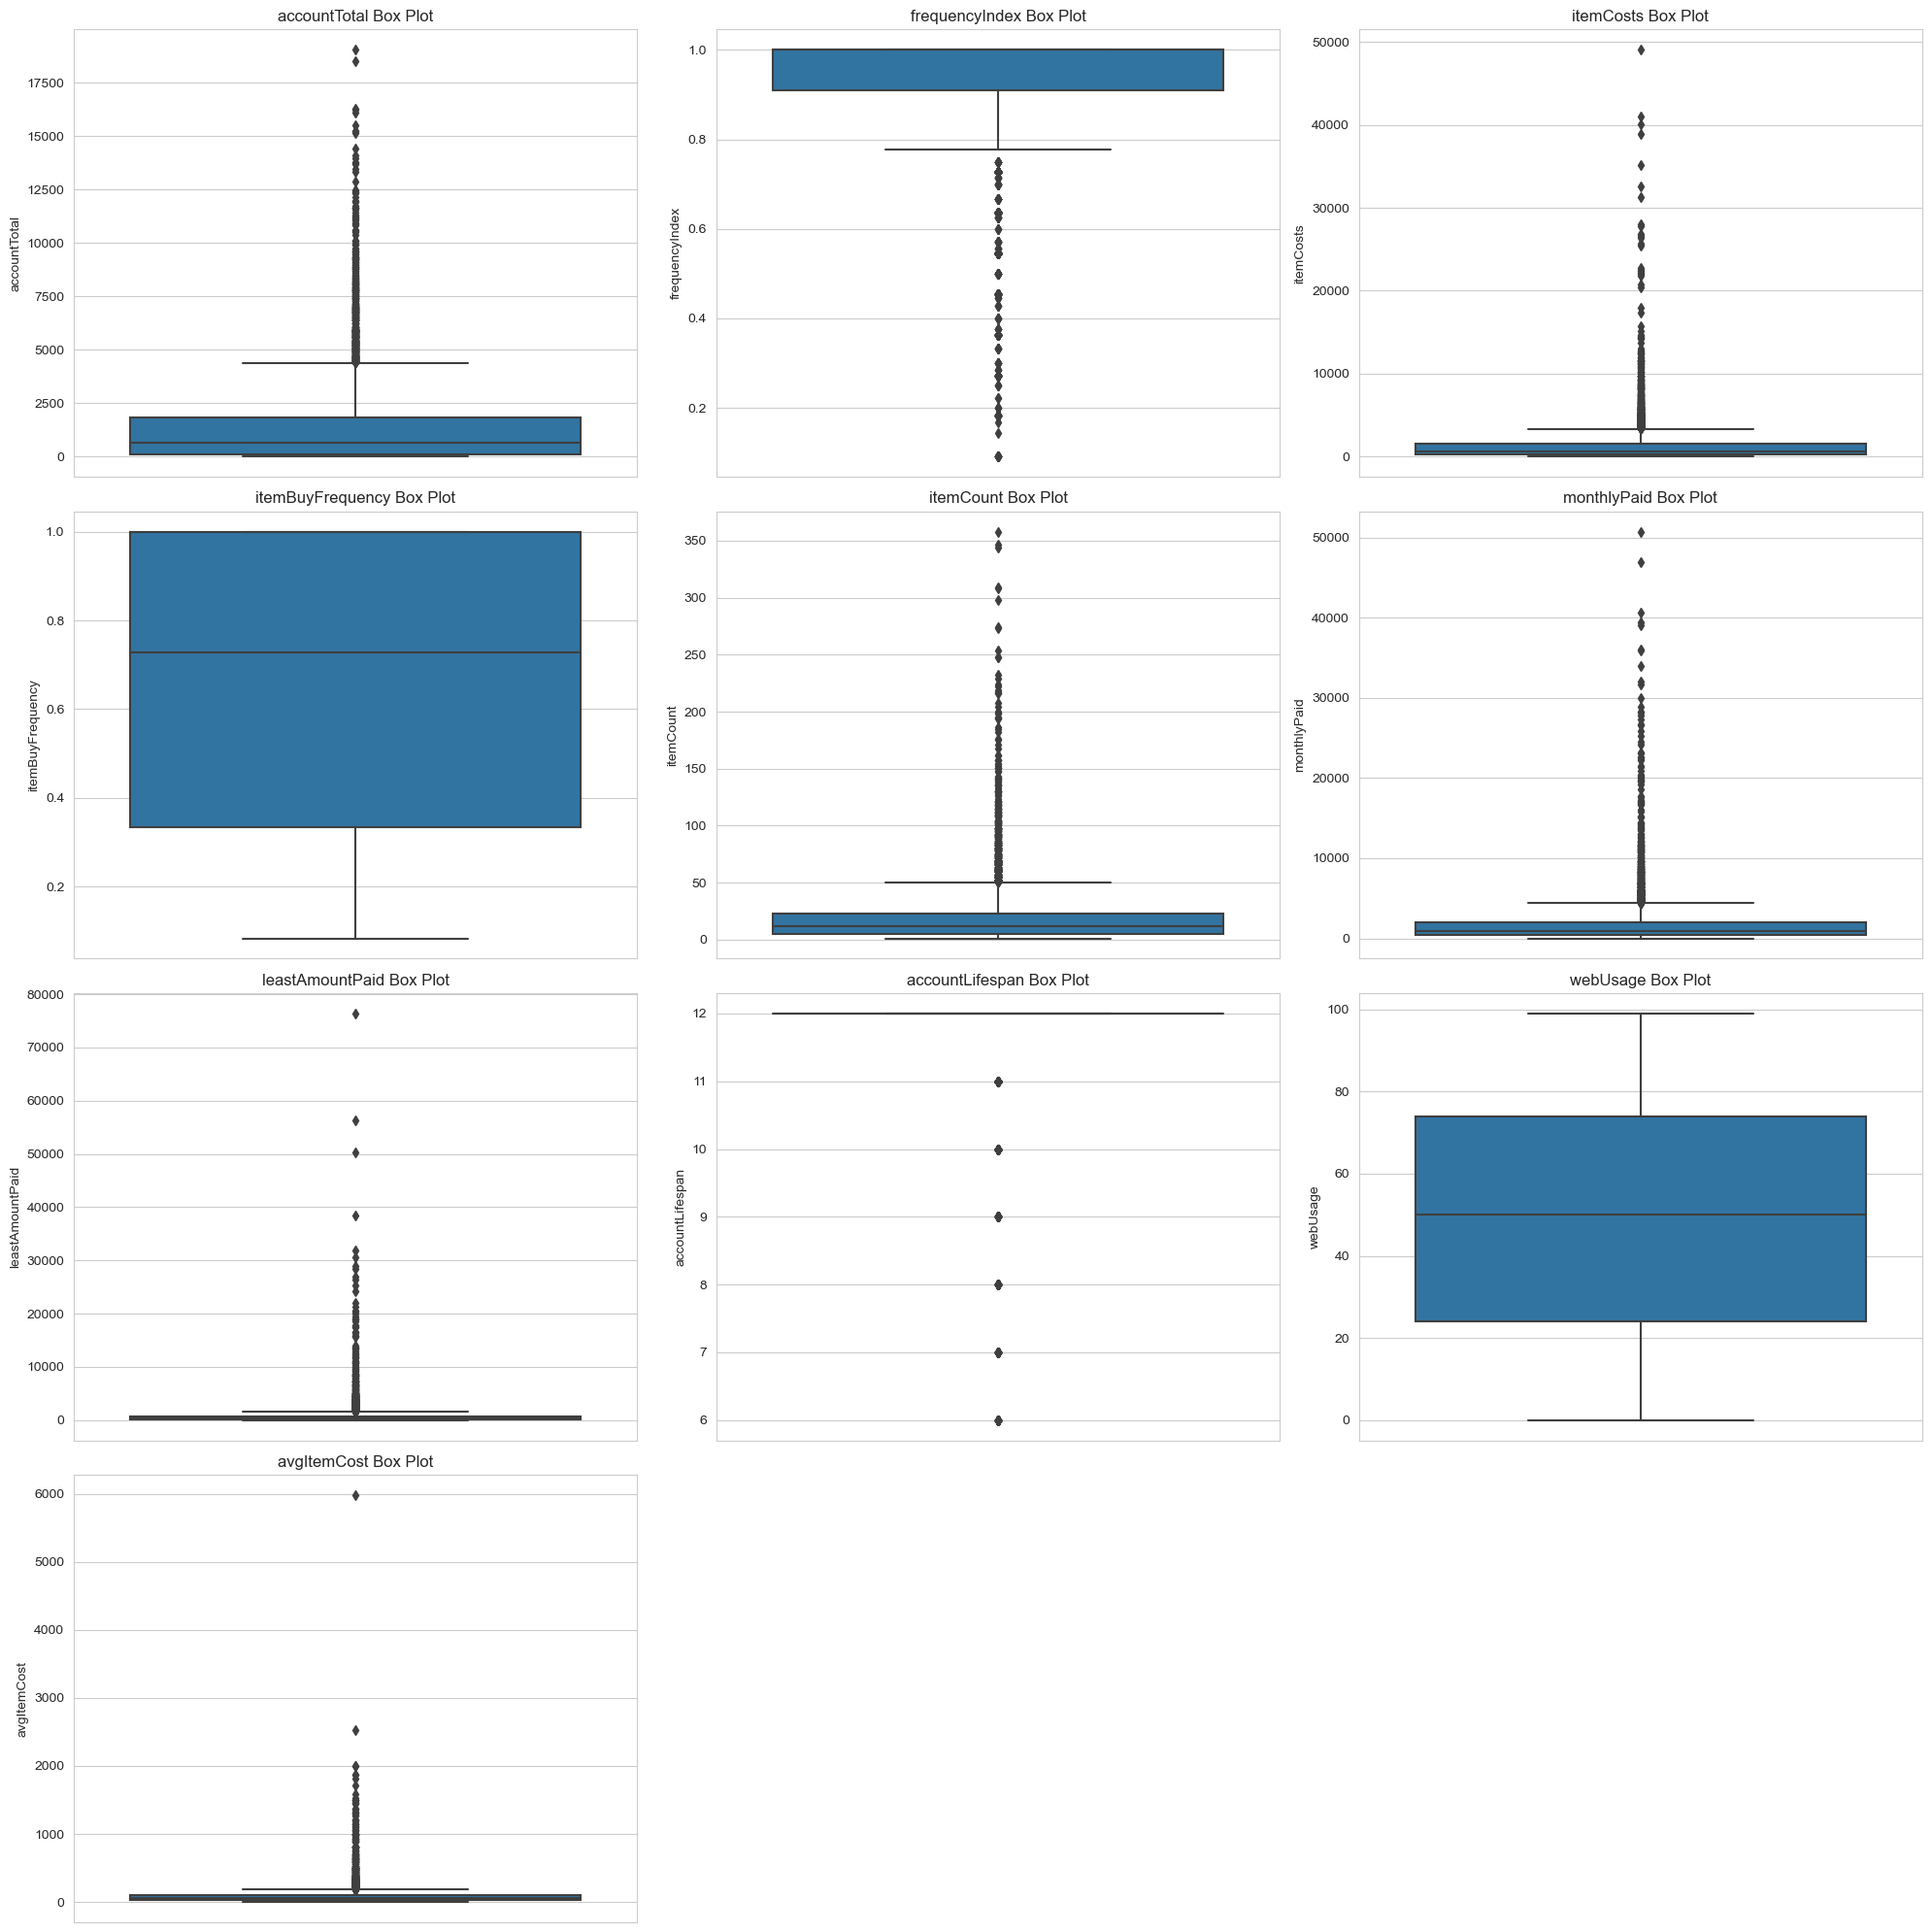

In [144]:
# Filtering out only numerical columns from our dataset for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Setting the style of the plots to one we've used a lot in class
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols 

# Setting up our figure
plt.figure(figsize=(20, n_rows * 5))

# Looping through our numerical columns and creating a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Box Plot")

plt.tight_layout()
plt.show()

#### Categorical Variables

We only have 2 categorical variables. For these we want to see if they are somehow unevenly distributed, which could introduce a bias problem into our dataset. We therefore use a countplot to show the occurrences of the individual categories. Fortunately they seem to be very evenly distributed.

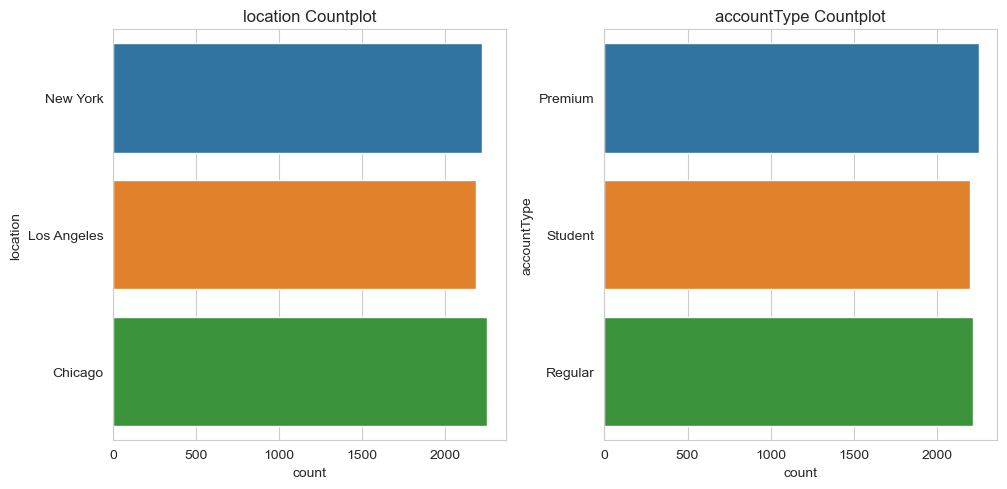

In [145]:
# Filtering out only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

sns.set_style("whitegrid")

n_cols = 4  
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols 

plt.figure(figsize=(20, n_rows * 5)) 

# creating the subplots
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col])
    plt.title(f"{col} Countplot")

plt.tight_layout()
plt.show()


## Univariate Analysis

Next, we want to better understand the distributions of our numerical variables. We therefore use histplots to visualise them for one variable at a time, again using subplots.


##### Some findings

- **accountLifespan:** has the same value for >90% of the datasaet. We suspect that this category is simply all accounts that have a lifespan of 12+ months, regardless of how much above 12 months they are in age. We have decided not to use this variable due to it being essentially the same value for almost all rows.

- **itemBuyFrequency:** This doesn't seem to be a univariate index. While we know it's a value between 0 and 1, even by removing rows we would not expect this type of skewed distribution favoring the maximal index point. We would expect it to look more like the **webUsage Distribution** chart.

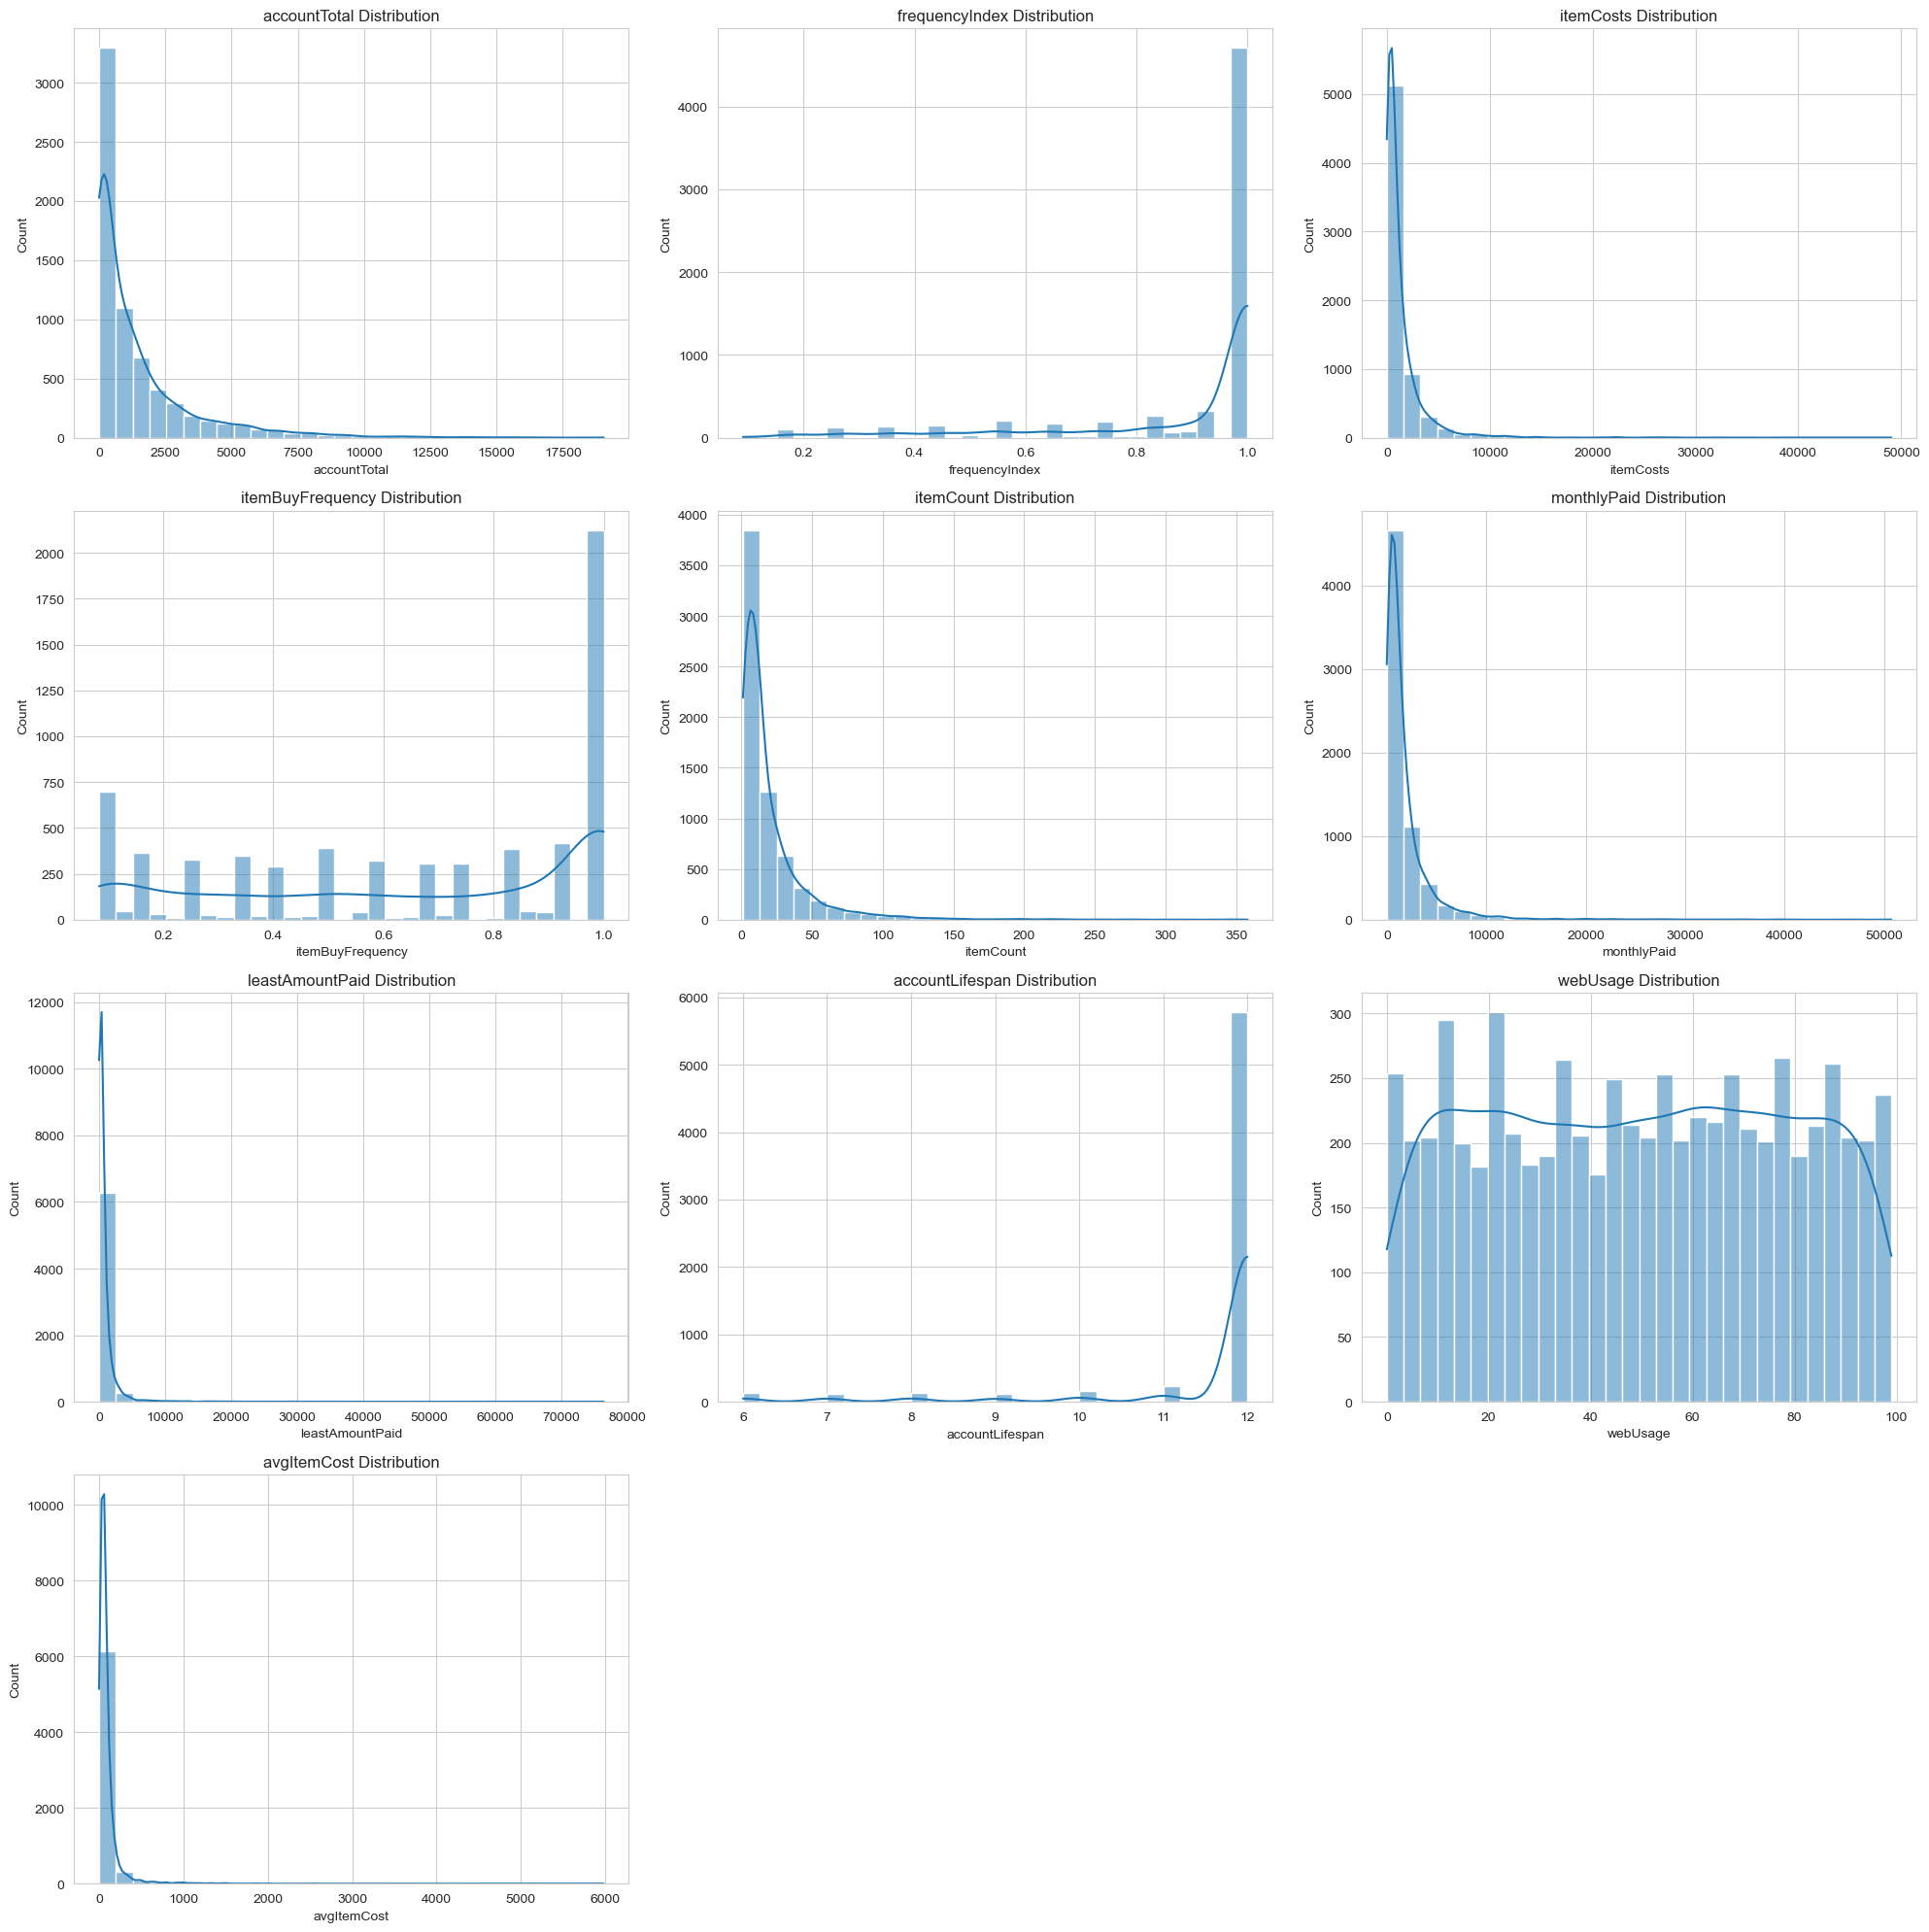

In [146]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.set_style("whitegrid")

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

## Pair Plots

Next, we use pair plots to get a first look at potential relationships in our dataset. Since we still have quite a number of variables we end up with a big plot. We can also already see that several of the graphs have issues with massive outliers scaling the majority of data points into a tight cluster and making it hard to see meaningful trends. The only really 'clear' relationships are the ones were we suspect high correlation, e.g. itemCosts (total amount spend on items) and monthlyPaid (average monthly spending). Or that ItemCosts (amount spent on items) increases with ItemCount (number of items bought).

/Users/janstein/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


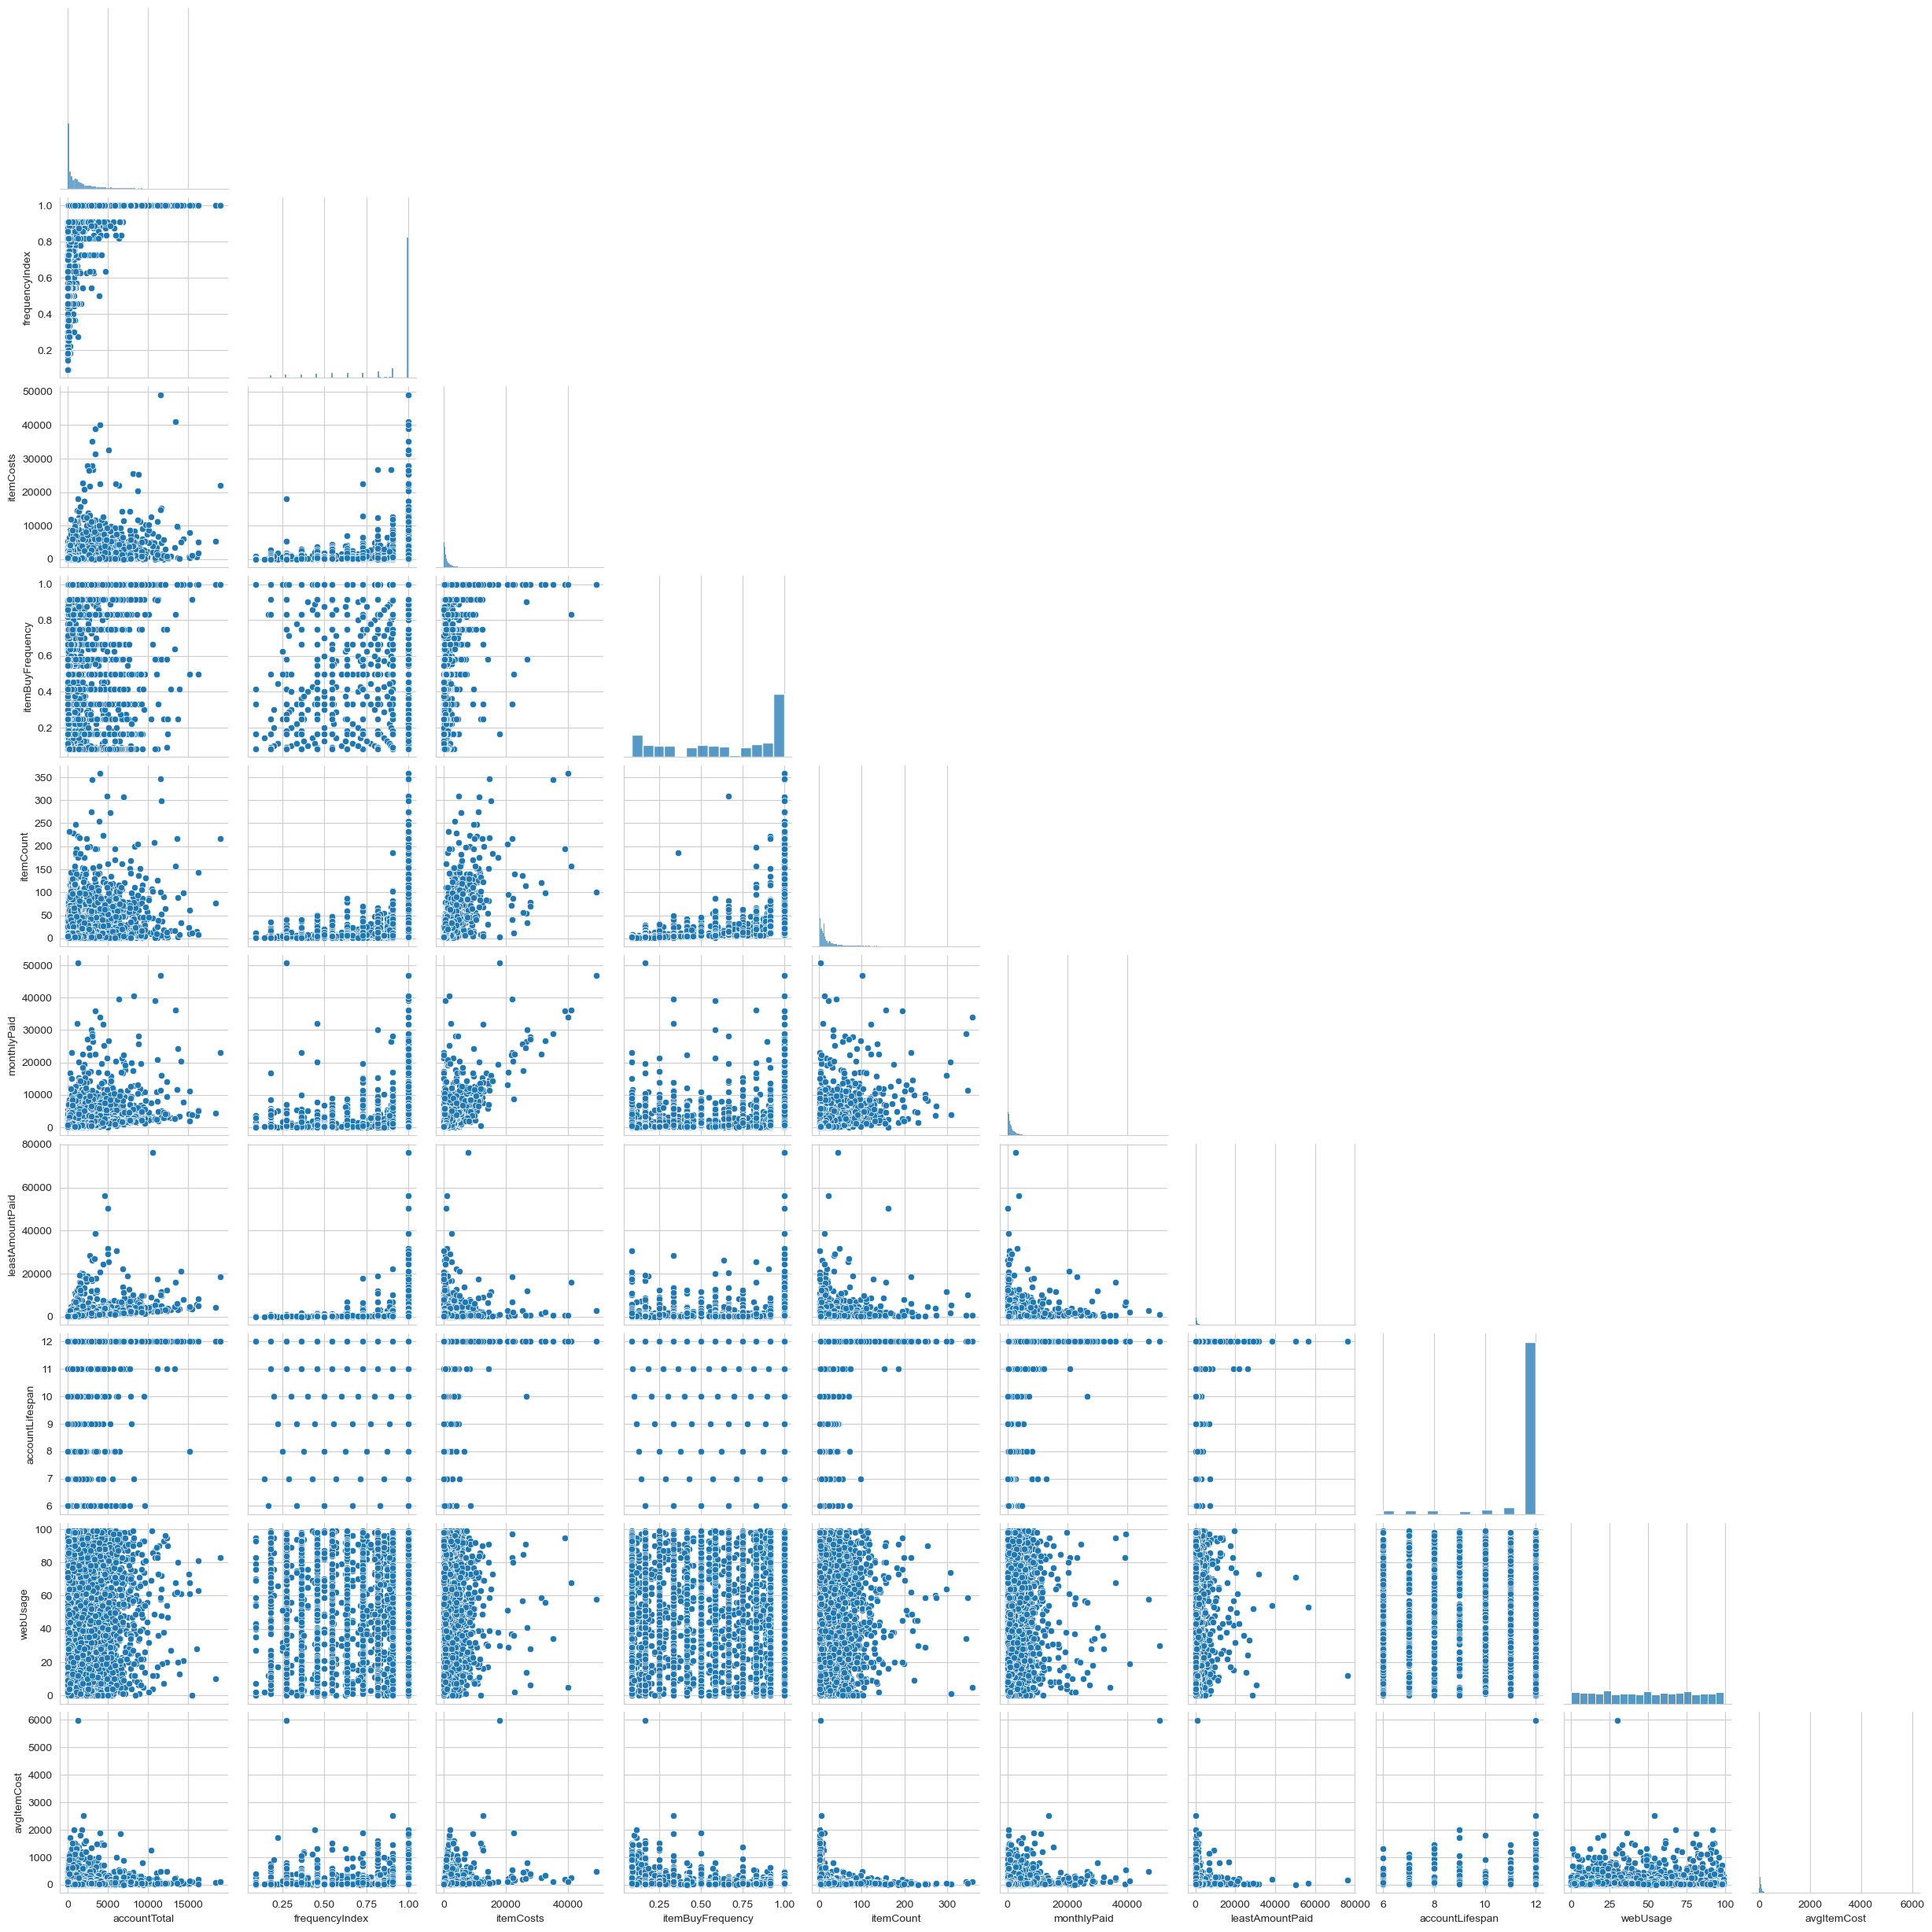

In [105]:
sns.pairplot(df, corner=True)
plt.show()

## Correlation HeatMap

We proceed with taking a look at the correlation heatmap to see how are variables are correlated, and if we have issues with e.g. multicollinearity. As indicated in the pairplot, we can see that the two aforementioned variables have a relatively high correlation.

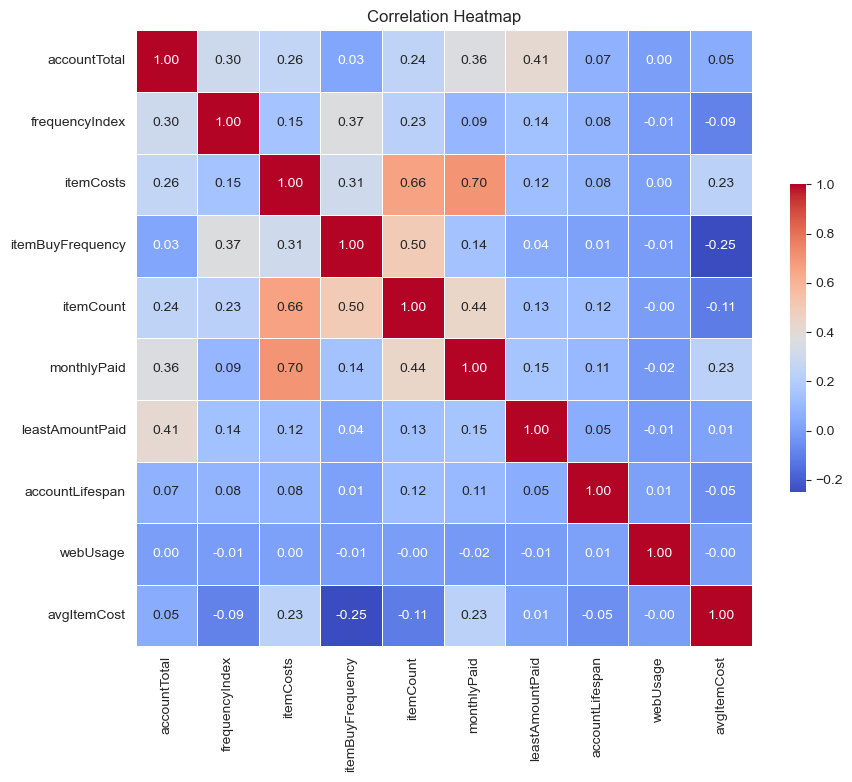

In [148]:
# Selecting only our numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr = numerical_data.corr()

# Generating a cool heatmap in Seaborn with one of Fabio's favorite colour schemes
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlation Heatmap")
plt.show()


# Preprocessing
##### We start by separating categorical from numerical columns

In [149]:
categorical_cols = ['location', 'accountType']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

### Encoding categorical variables

We chose to go with the pandas get_dummies function

In [108]:
df_dummies = pd.get_dummies(df[categorical_cols])
print(df_dummies)

      location_Chicago  location_Los Angeles  location_New York  \
0                False                 False               True   
2                False                 False               True   
4                False                 False               True   
5                False                 False               True   
6                False                 False               True   
...                ...                   ...                ...   
8944              True                 False              False   
8945              True                 False              False   
8946             False                 False               True   
8948             False                  True              False   
8949              True                 False              False   

      accountType_Premium  accountType_Regular  accountType_Student  
0                    True                False                False  
2                   False                False         

### Scaling the numerical variables

We scale the numerical variables using StandardScaler into a unitless measure with mean 0 and st.dev 1. This will help us prevent issues with outliers and different variable sizes and units

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

print(df_scaled.shape)
print(df_dummies.shape)

df_scaled.head()


(6660, 10)
(6660, 6)


accountTotal  frequencyIndex  itemCosts  itemBuyFrequency  itemCount  \
0     -0.189423       -0.288479  -0.008712         -0.421204  -0.423640   
1     -0.645764       -0.361142  -0.416941         -1.652808  -0.681784   
2     -0.684392       -1.887126  -0.533420         -1.406485  -0.681784   
3     -0.460063        0.510847  -0.112352         -1.406485  -0.571150   
4     -0.431817       -0.797137   0.558350          0.071439  -0.239251   

   monthlyPaid  leastAmountPaid  accountLifespan  webUsage  avgItemCost  
0    -0.532846        -0.268502        -4.479958  0.371273     0.421337  
1    -0.533694        -0.307591         0.332513 -0.982156     1.456126  
2    -0.573120        -0.335111        -4.479958  0.336570    -0.222406  
3    -0.217659        -0.267826         0.332513  0.232460     1.036191  
4    -0.296377        -0.271718         0.332513 -0.322793     0.669843

### Putting the variables back together

In [153]:
# Reseting the indices of both DataFrames before concatenation to avoid introducing NaN's. We learned this the hard way.. (:
df_scaled_reset = df_scaled.reset_index(drop=True)
df_dummies_reset = df_dummies.reset_index(drop=True)

# Concatenating the two datasets
df_final = pd.concat([df_scaled_reset, df_dummies_reset], axis=1)

# Checking for NaNs in the final DF
nan_counts = df_final.isna().sum()
print(nan_counts)

accountTotal            0
frequencyIndex          0
itemCosts               0
itemBuyFrequency        0
itemCount               0
monthlyPaid             0
leastAmountPaid         0
accountLifespan         0
webUsage                0
avgItemCost             0
location_Chicago        0
location_Los Angeles    0
location_New York       0
accountType_Premium     0
accountType_Regular     0
accountType_Student     0
dtype: int64


### Type of problem & concerns with data distribution

Identifying the buying behaviour of customers through segmentation is a clustering problem, as we are trying to determine both the suitable segments as well as the appropriate segment identity of the customers in question in regards to these clusters.

To analyse the buying behaviour, we are specifically interested in the variables **'monthlyPaid'** and **'avgItemCost'**. However, these include extreme outliers, as can be seen both in the outlier plots earlier in our EDA, as well as in the difference between the 75% and max columns in the .describe() method used above.

In order to better analyse the relationship of the larger customer group, we are considering to cut out customers where these values are above 3 standard deviations in either or both of these values. Customers who end up in these extreme localities will instead be offered special services from a Customer Relations manager on an individual basis because it is difficult to generalize from outliers and their existence could seriously hamper the functionality of algorithms used to analyse the dataset.

**We continue with analysing the impact this would have on our dataset**

In [155]:
# Creating conditions for values greater than 3 on either variable
condition = (df_final['monthlyPaid'] > 3) | (df_final['avgItemCost'] > 3)

# Counting the number of rows affected
count = condition.sum()

print(f"Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: {count}")

Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: 221


##### Removing the outliers

Due to the relativel small amount (221) of customers that this affects, we chose to proceed with the intended cut-off. This elmininates ~3.3% of customers from our investigation. We then re-check the max values for our two variables to check that it worked.

In [154]:
df_filtered = df_final[~condition]

df_filtered.describe().T

count      mean       std       min       25%       50%  \
accountTotal      6439.0 -0.031741  0.951643 -0.693215 -0.648580 -0.391340   
frequencyIndex    6439.0  0.002061  0.998723 -3.849104  0.074852  0.510847   
itemCosts         6439.0 -0.074609  0.633140 -0.557321 -0.454330 -0.311728   
itemBuyFrequency  6439.0  0.014967  0.989610 -1.652808 -0.913846  0.317758   
itemCount         6439.0 -0.028792  0.888039 -0.681784 -0.534273 -0.276129   
monthlyPaid       6439.0 -0.099126  0.574495 -0.613413 -0.470221 -0.304516   
leastAmountPaid   6439.0 -0.013560  0.983598 -0.358693 -0.288526 -0.255290   
accountLifespan   6439.0  0.002165  0.997620 -4.479958  0.332513  0.332513   
webUsage          6439.0  0.001874  0.999607 -1.710925 -0.878046  0.024240   
avgItemCost       6439.0 -0.106495  0.447490 -0.566839 -0.368504 -0.238120   

                       75%        max  
accountTotal      0.152548   8.312549  
frequencyIndex    0.510847   0.510847  
itemCosts         0.046596   5.453812  
itemBuyFrequency  1.056720   1.056720  
itemCount         0.129526  10.676550  
monthlyPaid       0.035794   2.947086  
leastAmountPaid  -0.034838  32.933788  
accountLifespan   0.332513   0.332513  
webUsage          0.857120   1.724702  
avgItemCost      -0.021671   2.998915

#### Plotting the distribution of our 2 variables after pre-processing

Through scaling the data with the StandardScaler and removing extreme outliers we can already see a more coherent pattern in our distribution

**Some Conclusions**

We are left with a much more managable dataset. Just from looking at it, we can see that while the majority of customers are centered around the mean 0 (obviously, as expected). We can also see that there seems to be a considerable distinction between customers who have high monthly spending because of cheap items, and customers who buy expensive items but a lot less frequently.

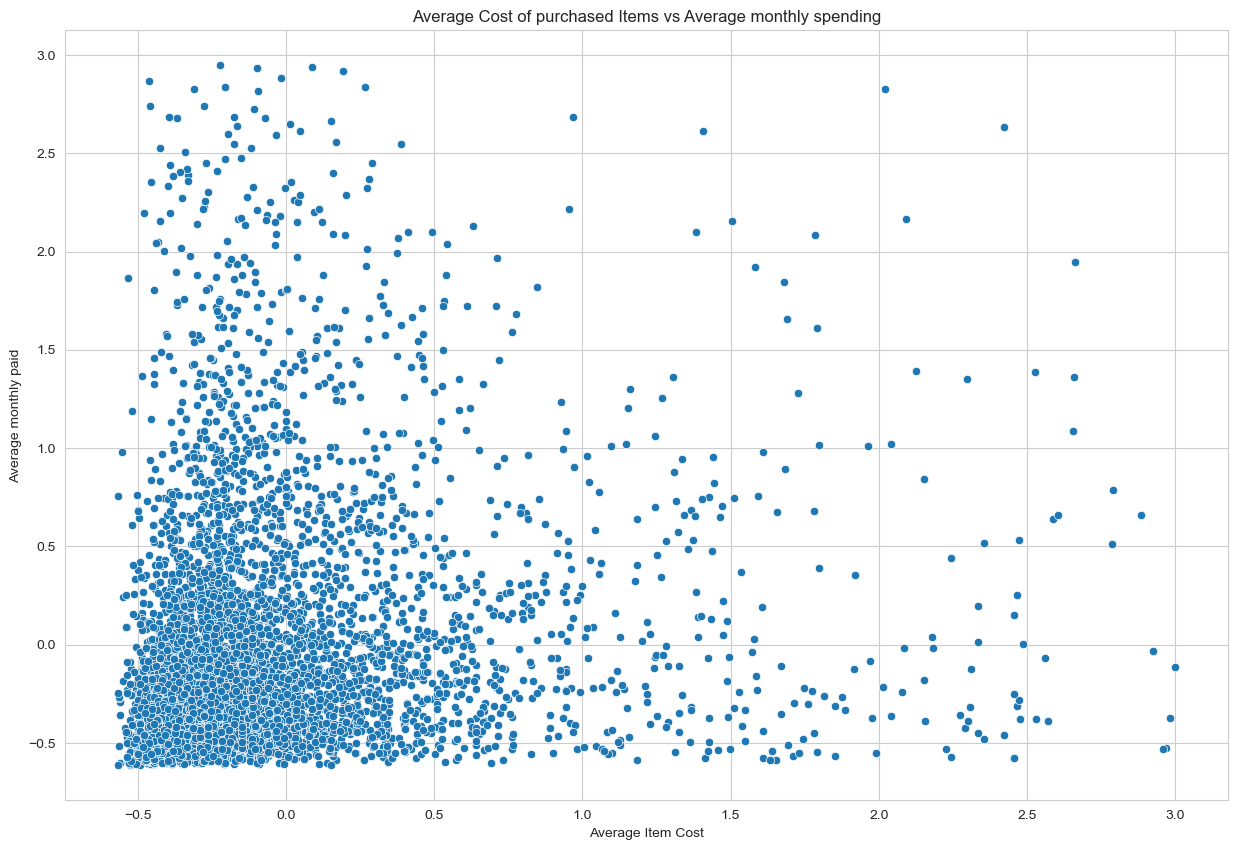

In [114]:
plt.figure(figsize=(15, 10)) 
sns.scatterplot(data=df_filtered, x='avgItemCost', y='monthlyPaid')
plt.title('Average Cost of purchased Items vs Average monthly spending')
plt.xlabel('Average Item Cost')
plt.ylabel('Average monthly paid')
plt.show()

# Clustering Algorithms

Now that we have a dataset and a plan we can get to doing actual clustering. But first we drop excess variables that are not avgItemCost or monthlyPaid from our dataset:

In [115]:
col_to_keep = ['avgItemCost', 'monthlyPaid']
df_cluster = df_filtered[col_to_keep]

X_cluster = df_cluster.to_numpy()

## KMeans Clustering

The first clustering method we try is KMeans. We proceed by trying a number of different clusters and save their inertia values to a list for further analysis. We plot the results in subplots, using the fantastic loop method that Davide Torre showed us at the lab session on November 10th. Big shoutout to Davide!

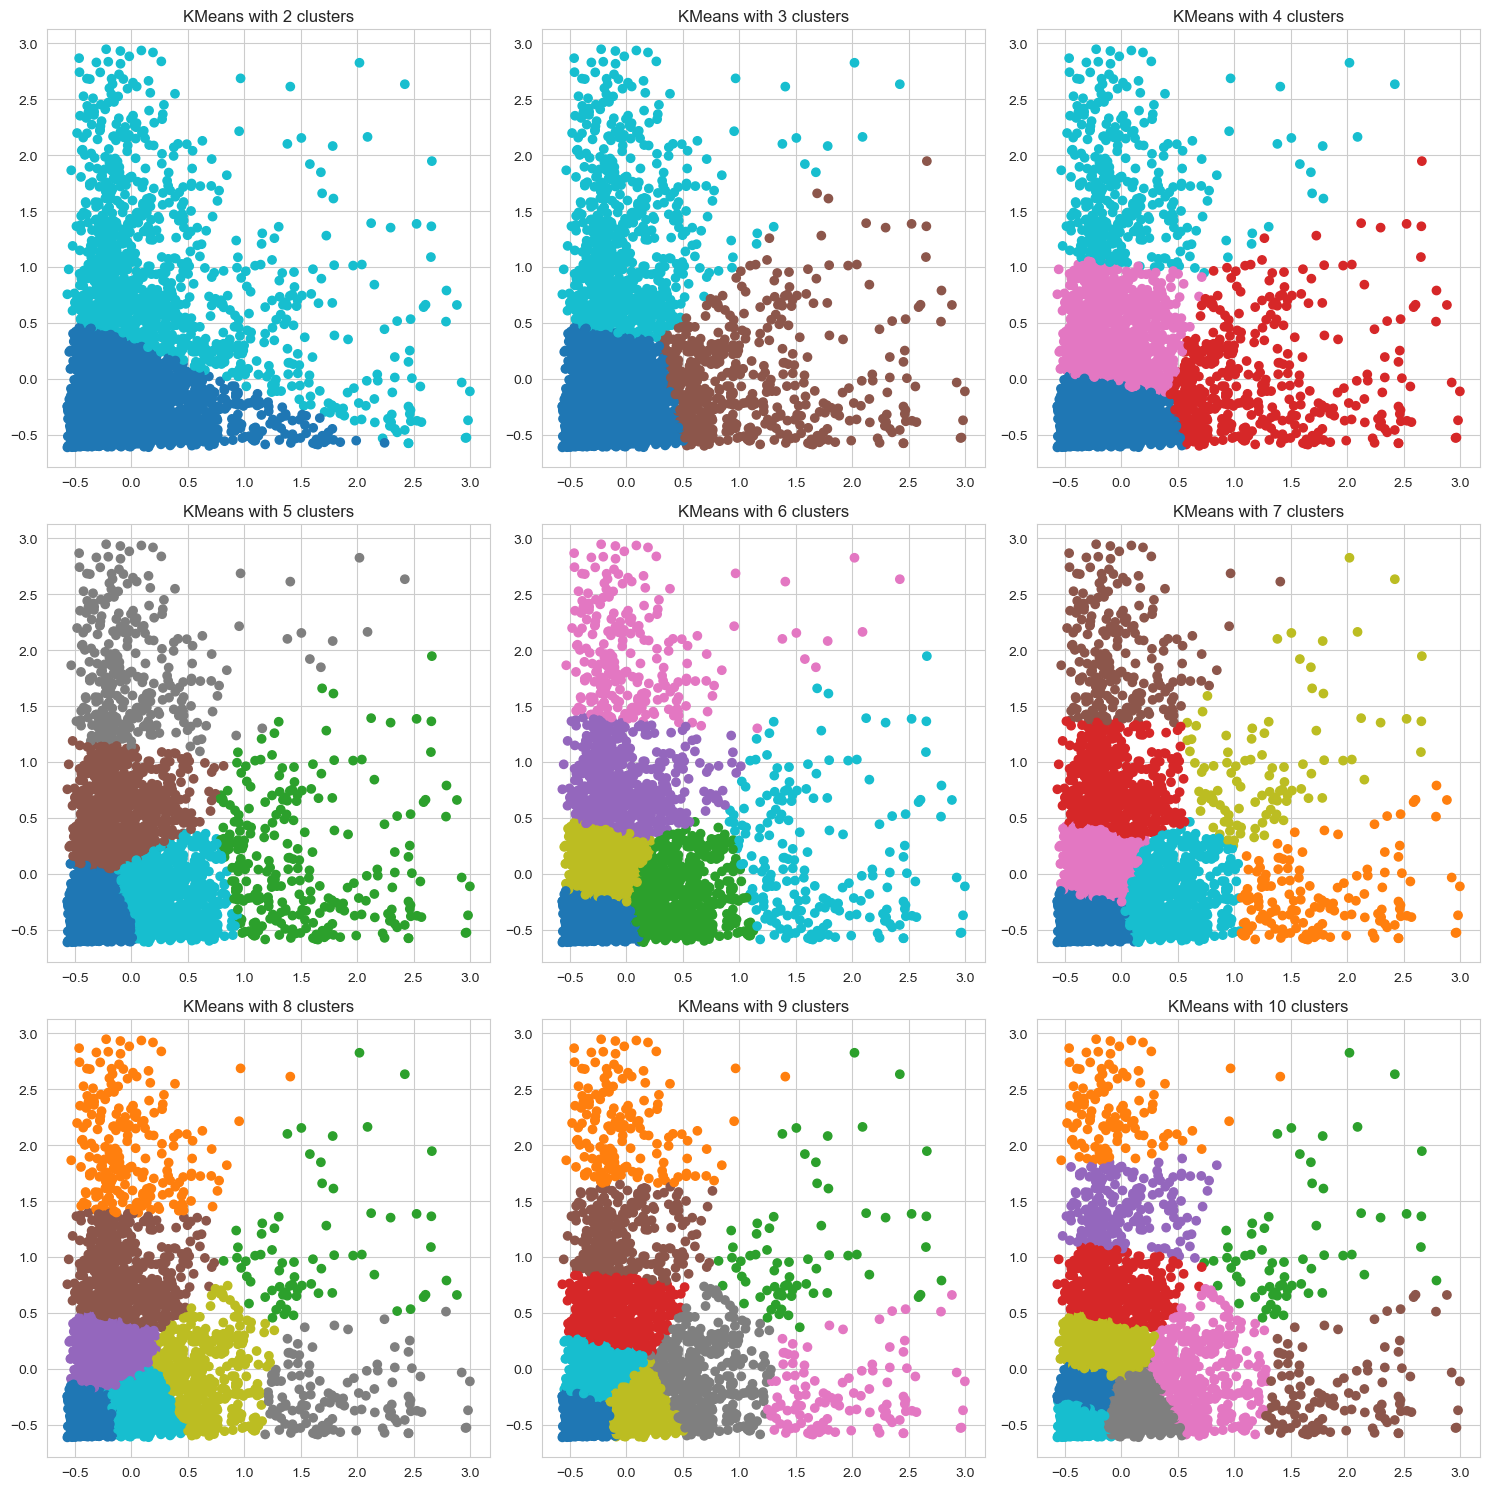

In [156]:
from sklearn.cluster import KMeans

# Clusters we want to try
cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Setting up a 3x3 grid for our subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten() # Flattening to 1D array for easy iteration

sum_of_squared_distances = []

# Iterating over the different numbers of clusters
for i, n_clusters in enumerate(cluster_counts):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++', random_state=404)
    y = kmeans.fit_predict(X_cluster)

    sum_of_squared_distances.append(kmeans.inertia_)

    # Adding the scatter plot to our subplots
    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'KMeans with {n_clusters} clusters')

plt.tight_layout()
plt.show()

#### Elbow Method to evaluate number of clusters

We use the inertia values collected in the previous step to plot the 'Elbow Method'. Unfortunately the elbow is not as clear as we would ideally prefer.

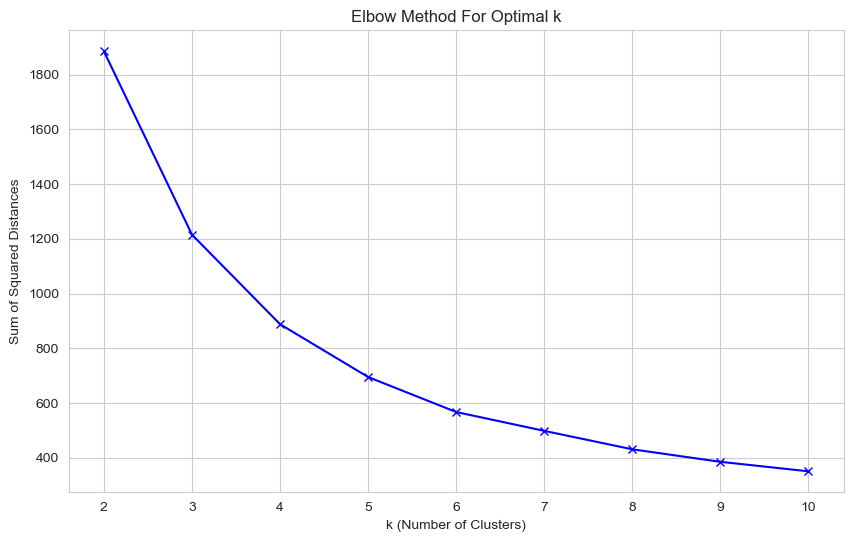

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette Score

To investigate further, we compute the silhouette scores for the different numbers of clusters:

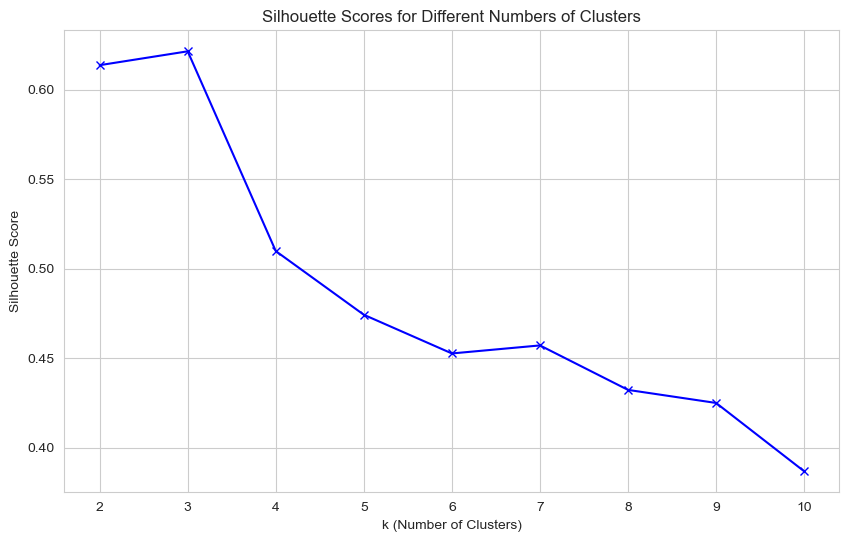

In [158]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
kmeans_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++', random_state=404)
    cluster_labels = kmeans.fit_predict(X_cluster)

    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_values, kmeans_silhouette_scores, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

## DBSCAN Clustering

Next, we proceed with DBSCAN clustering. Similarly to before, we try a range of different parameters and create subplots with the results. We also save the silhouette scores for each iteration to a list to later plot it. This loop was a bit more tricky, as the silhouette score can only be calculated when there are at least 2 clusters, and it's affected by noise. We therefore added logic to check for this inside the loop.

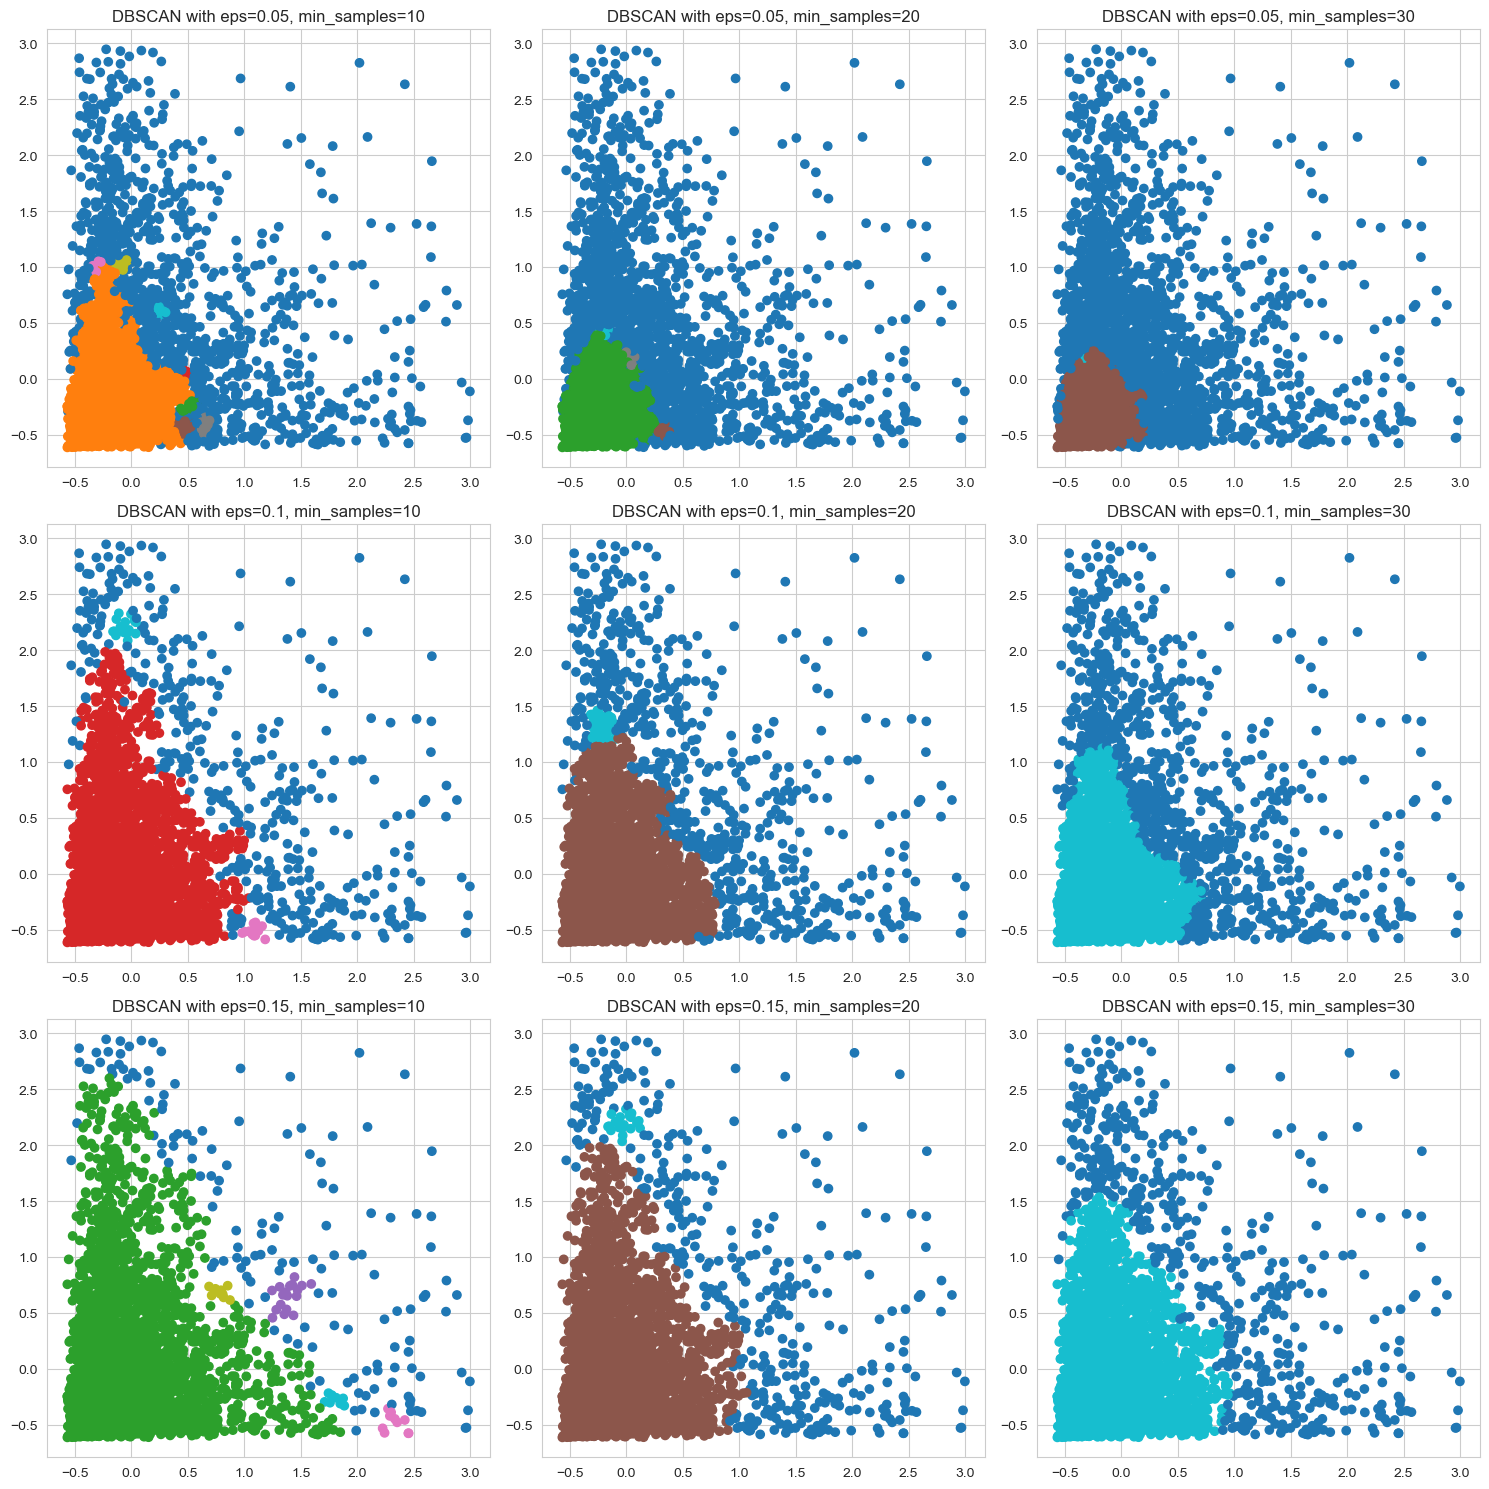

In [160]:
from sklearn.cluster import DBSCAN

# Defining combinations of eps and min_samples that we deemed relevant after some testing
dbscan_params = [
    (0.05, 10), (0.05, 20), (0.05, 30),
    (0.1, 10), (0.1, 20), (0.1, 30),
    (0.15, 10), (0.15, 20), (0.15, 30)
]

dbscan_silhouette_scores = []
param_labels = []

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

# Iterating over the different parameter combinations
for i, (eps, min_samples) in enumerate(dbscan_params):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y = dbscan.fit_predict(X_cluster)

    # Checking if there are at least two non-noise clusters
    labels = np.unique(y[y != -1])
    if len(labels) > 1:
        # Calculating silhouette score excluding noise points
        score = silhouette_score(X_cluster[y != -1], y[y != -1])
        dbscan_silhouette_scores.append(score)
    else:
        # Indicating no (or only one) valid clusters
        dbscan_silhouette_scores.append(None)

    param_labels.append(f'eps={eps}, min_samples={min_samples}')

    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'DBSCAN with eps={eps}, min_samples={min_samples}')

plt.tight_layout()
plt.show()

##### Plotting Silhouette Scores

We proceed to create a bar chart with the different Silhouette scores. Where no Silhouette score was calculated (due to noise or not enough clusters), a 0 represents this fact.

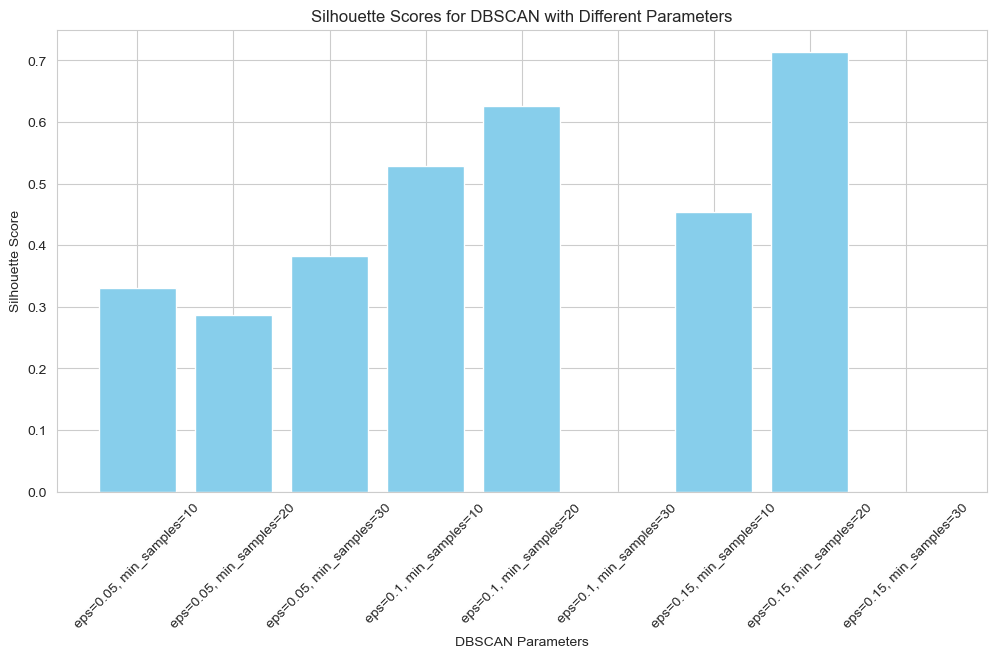

In [161]:
# Replacing 'None' values with 0 to be able to plot them in our graph
silhouette_scores = [score if score is not None else 0 for score in dbscan_silhouette_scores]

plt.figure(figsize=(12, 6))
plt.bar(param_labels, silhouette_scores, color='skyblue')
plt.xlabel('DBSCAN Parameters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for DBSCAN with Different Parameters')
plt.xticks(rotation=45)
plt.show()

## Hierarchical Clustering

Next, we proceed with Hierarchical/Agglomerative Clustering. Like before, we plot a number of different cluster counts into a subplot visual to search for the best number of clusters and save the silhouette score to plot it later.

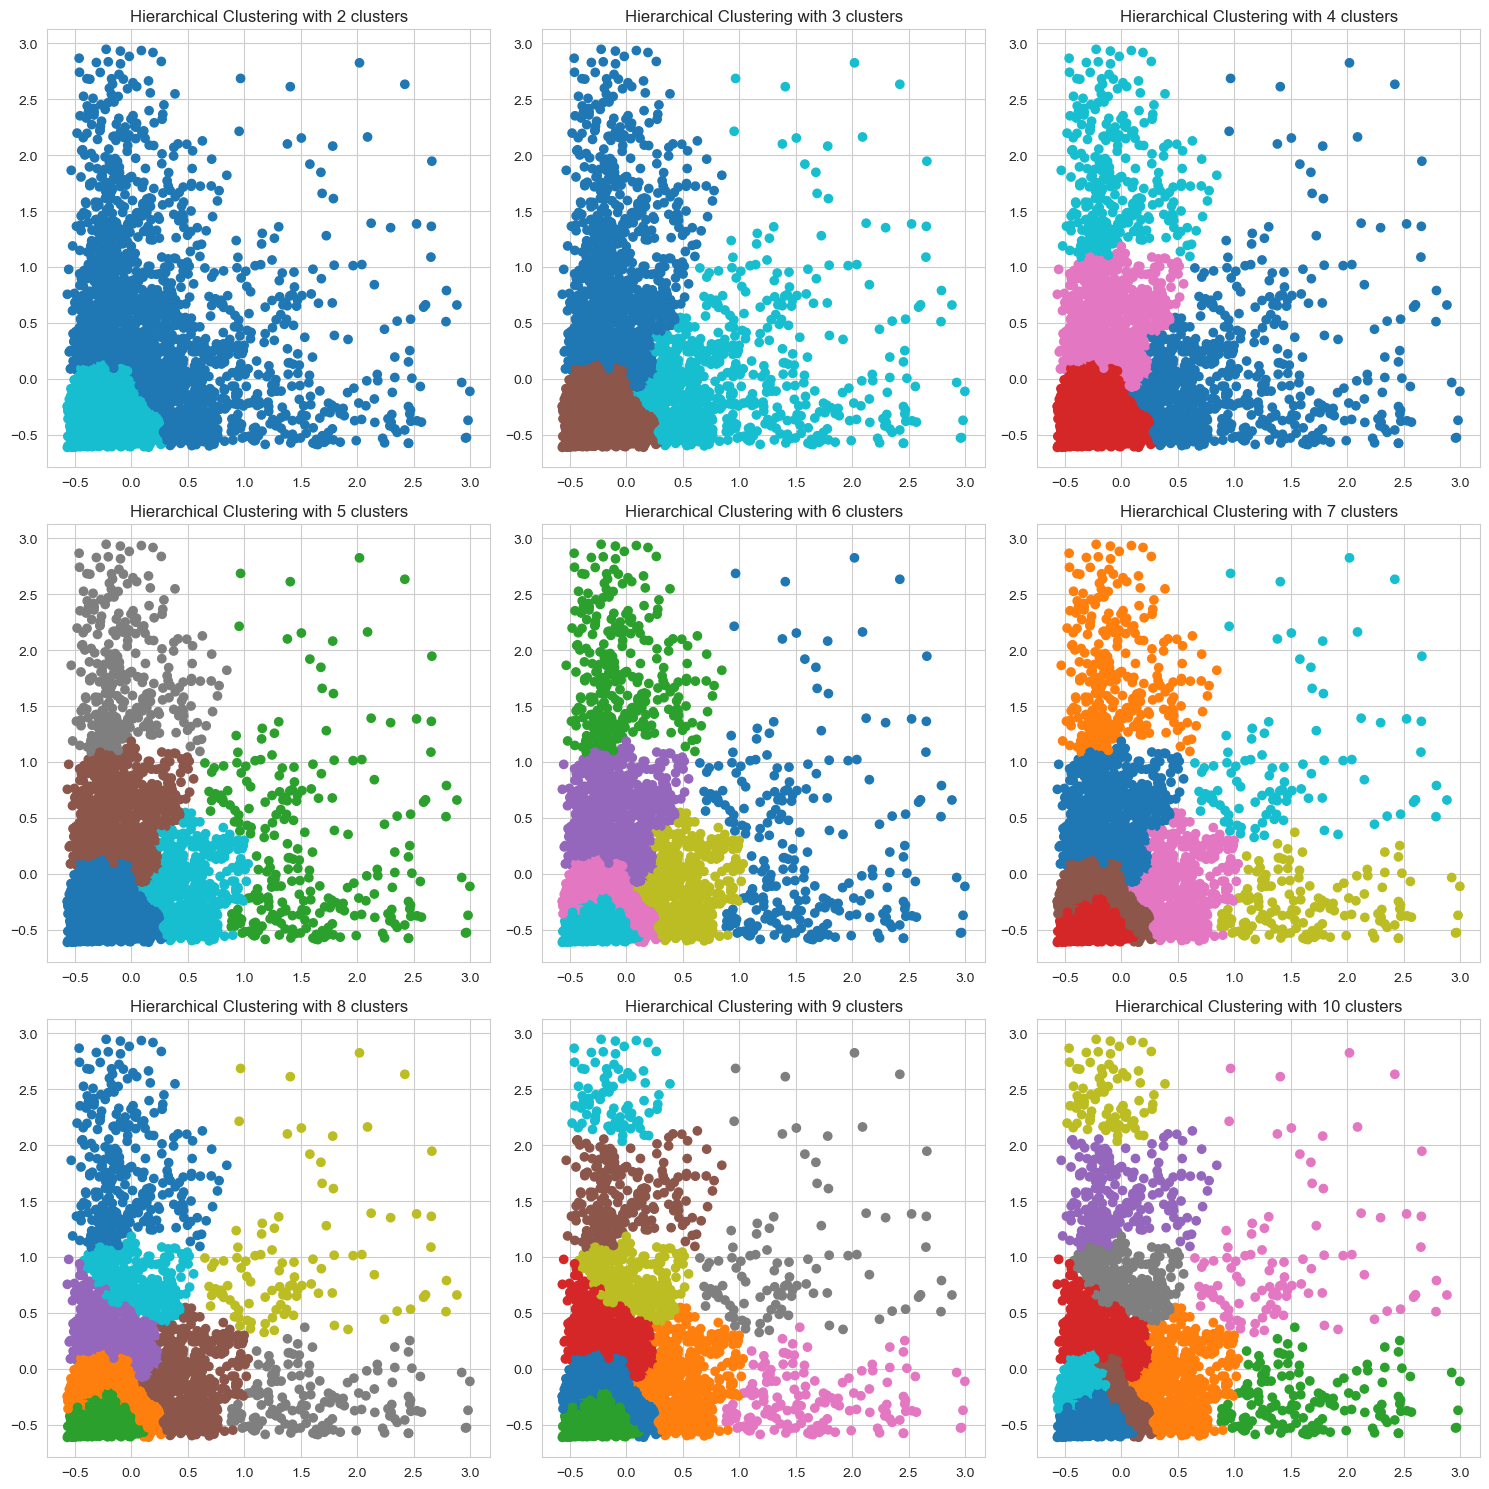

In [162]:
from sklearn.cluster import AgglomerativeClustering

cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

hierarchical_silhouette_scores = []

for i, n_clusters in enumerate(cluster_counts):
    
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    y = clustering.fit_predict(X_cluster)

    score = silhouette_score(X_cluster, y)
    hierarchical_silhouette_scores.append(score)

    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'Hierarchical Clustering with {n_clusters} clusters')

plt.tight_layout()
plt.show()


##### Silhouette Scores

Again, we plot the Silhouette Scores

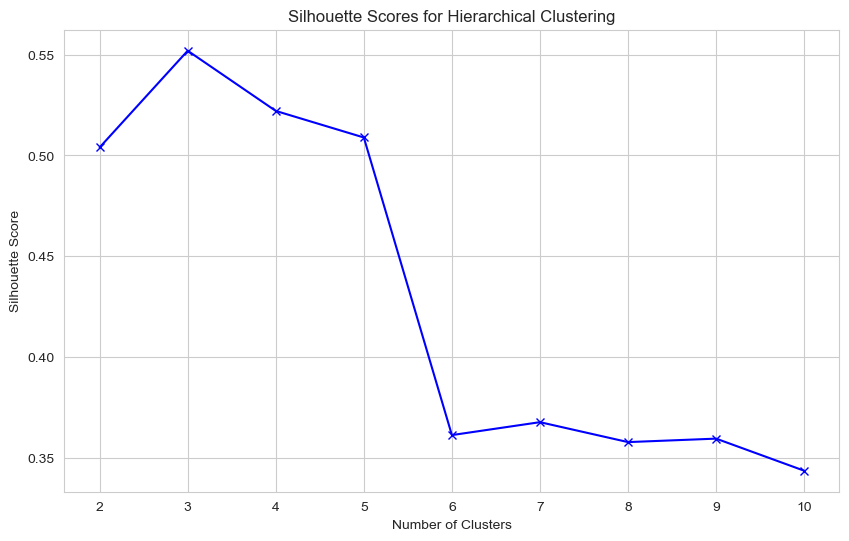

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, hierarchical_silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.show()

##### Dendogram

Another useful way to evaluate Hierarchical Clustering results is a Dendogram. We proceed with plotting one using the Scipy library.

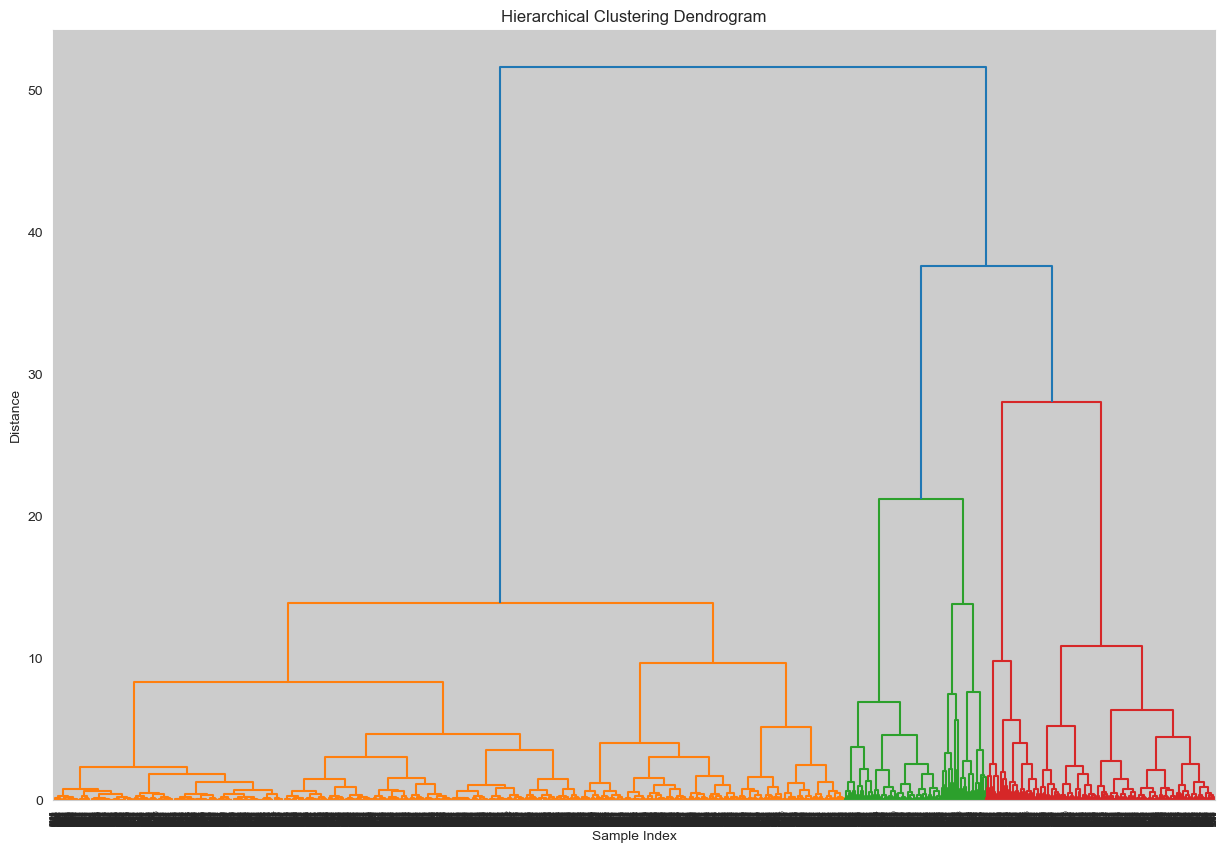

In [164]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X_cluster, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#### Dendogram step differences

To see the actual difference in distance of these steps we plot the distance between the last couple of steps in a separate chart

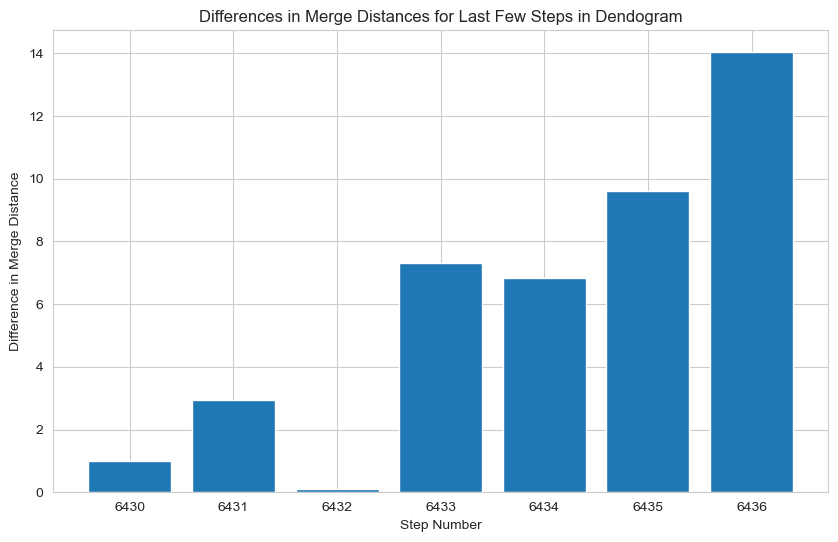

In [166]:
num_steps_to_consider = 8

# Calculating the difference in distance between successive merges for the last few steps
distance_diff = np.diff(Z[-num_steps_to_consider:, 2])

plt.figure(figsize=(10, 6))
plt.bar(range(len(Z) - num_steps_to_consider, len(Z) - 1), distance_diff)
plt.title('Differences in Merge Distances for Last Few Steps in Dendogram')
plt.xlabel('Step Number')
plt.ylabel('Difference in Merge Distance')
plt.show()


## Gaussian Mixture

Our last clustering method is Gaussian Mixture. Same as before, we try a number of different cluster counts and plot the results in a subplot visual for better comparison.

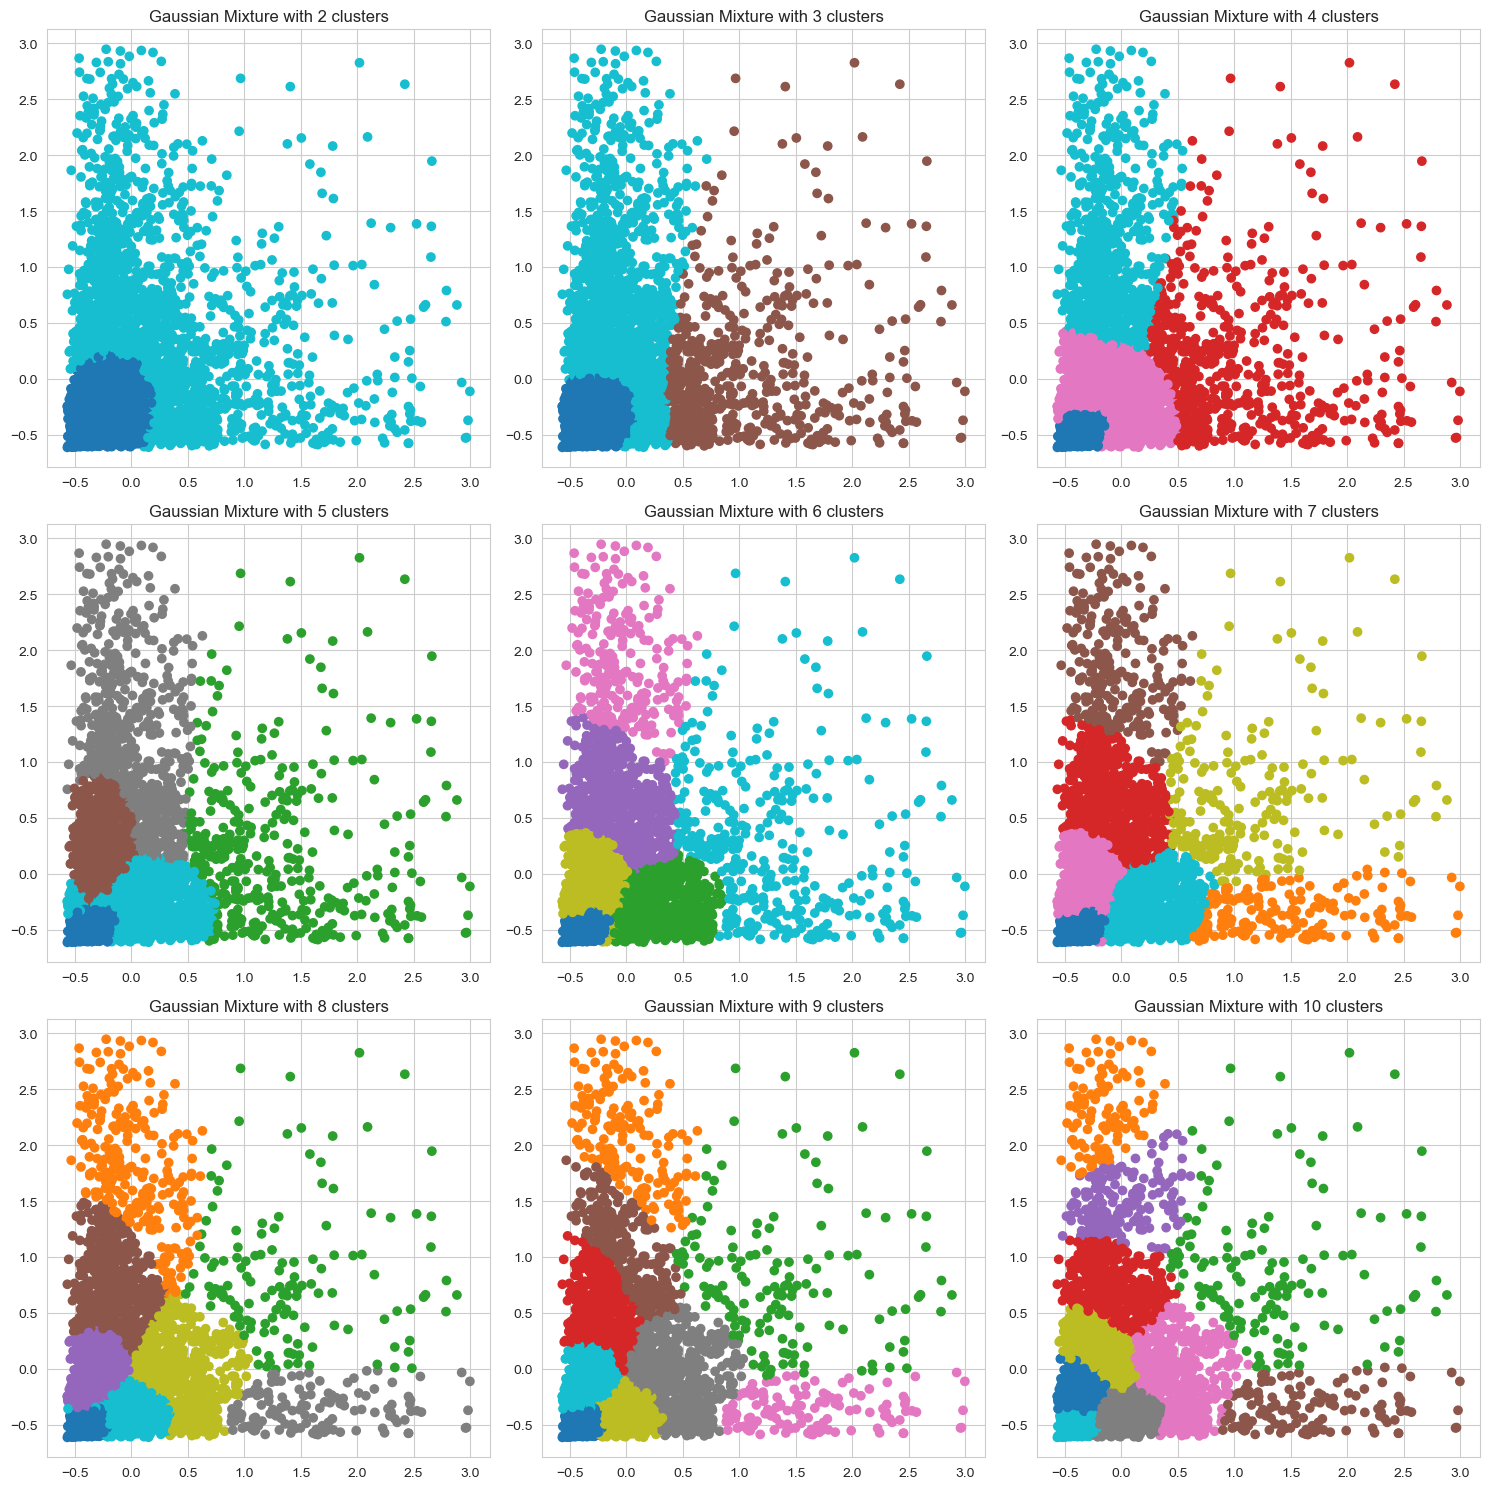

In [167]:
from sklearn.mixture import GaussianMixture

cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))  
axs = axs.flatten()

gaussian_silhouette_scores = []

for i, n_clusters in enumerate(cluster_counts):

    gmm = GaussianMixture(n_components=n_clusters, random_state=404)
    gmm.fit(X_cluster)
    y = gmm.predict(X_cluster)

    score = silhouette_score(X_cluster, y)
    gaussian_silhouette_scores.append(score)

    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'Gaussian Mixture with {n_clusters} clusters')

plt.tight_layout()
plt.show()


##### Plotting the Silhouette Scores

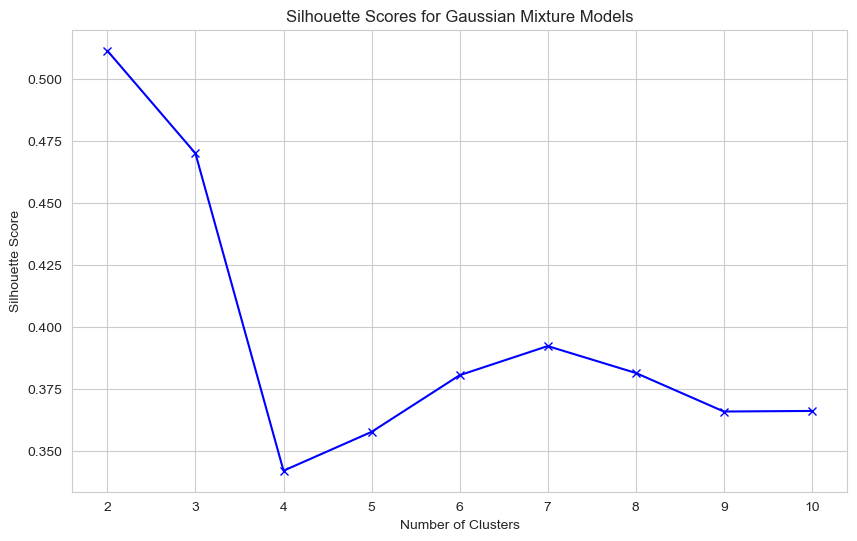

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, gaussian_silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Gaussian Mixture Models')
plt.xticks(cluster_counts)
plt.show()

# Comparing Models

We start by creating a visual that displays the silhouette scores for a couple of selected model/parameter combinations

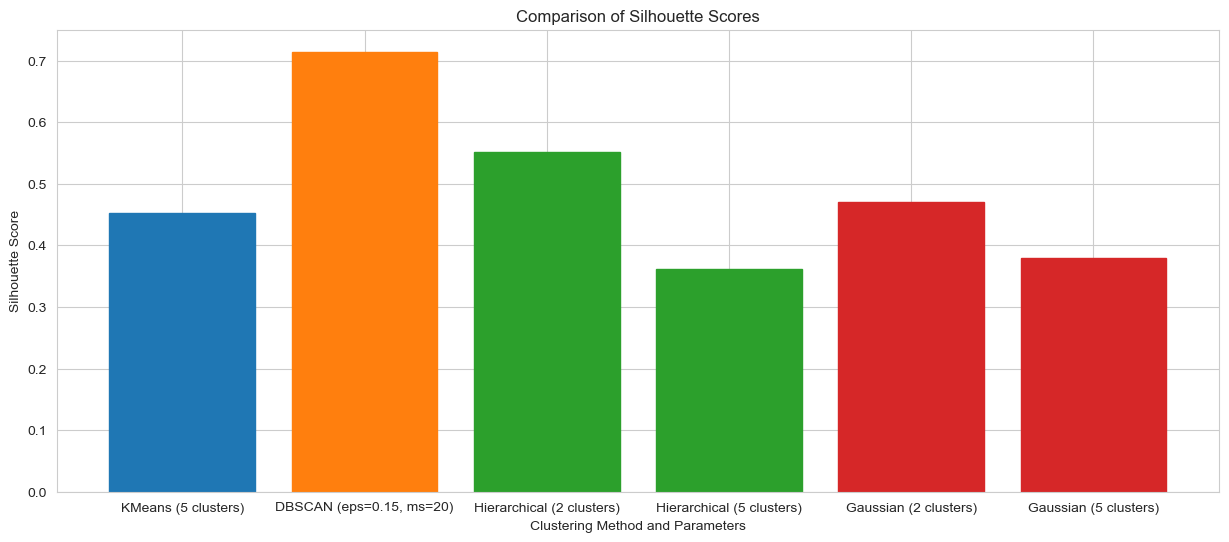

In [169]:
import matplotlib.pyplot as plt

kmeans_specific_score = kmeans_silhouette_scores[4]  # score for 5 clusters
dbscan_specific_score = dbscan_silhouette_scores[7]  # score for eps=0.15, min_samples=20
hierarchical_specific_score1 = hierarchical_silhouette_scores[1]  # score for 2 clusters
hierarchical_specific_score2 = hierarchical_silhouette_scores[4]  # score for 5 clusters
gaussian_specific_score1 = gaussian_silhouette_scores[1]  # score for 2 clusters
gaussian_specific_score2 = gaussian_silhouette_scores[4]  # score for 5 clusters

methods = ['KMeans (5 clusters)', 'DBSCAN (eps=0.15, ms=20)', 'Hierarchical (2 clusters)', 'Hierarchical (5 clusters)', 'Gaussian (2 clusters)', 'Gaussian (5 clusters)']
scores = [kmeans_specific_score, dbscan_specific_score, hierarchical_specific_score1, hierarchical_specific_score2, gaussian_specific_score1, gaussian_specific_score2]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728']

plt.figure(figsize=(15, 6))
barlist = plt.bar(methods, scores)
for i, bar in enumerate(barlist):
    bar.set_color(colors[i])
plt.xlabel('Clustering Method and Parameters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.show()


### Plotting the selected Model/Parameter Combinations in a combined visual

This allows us to better compare these visually

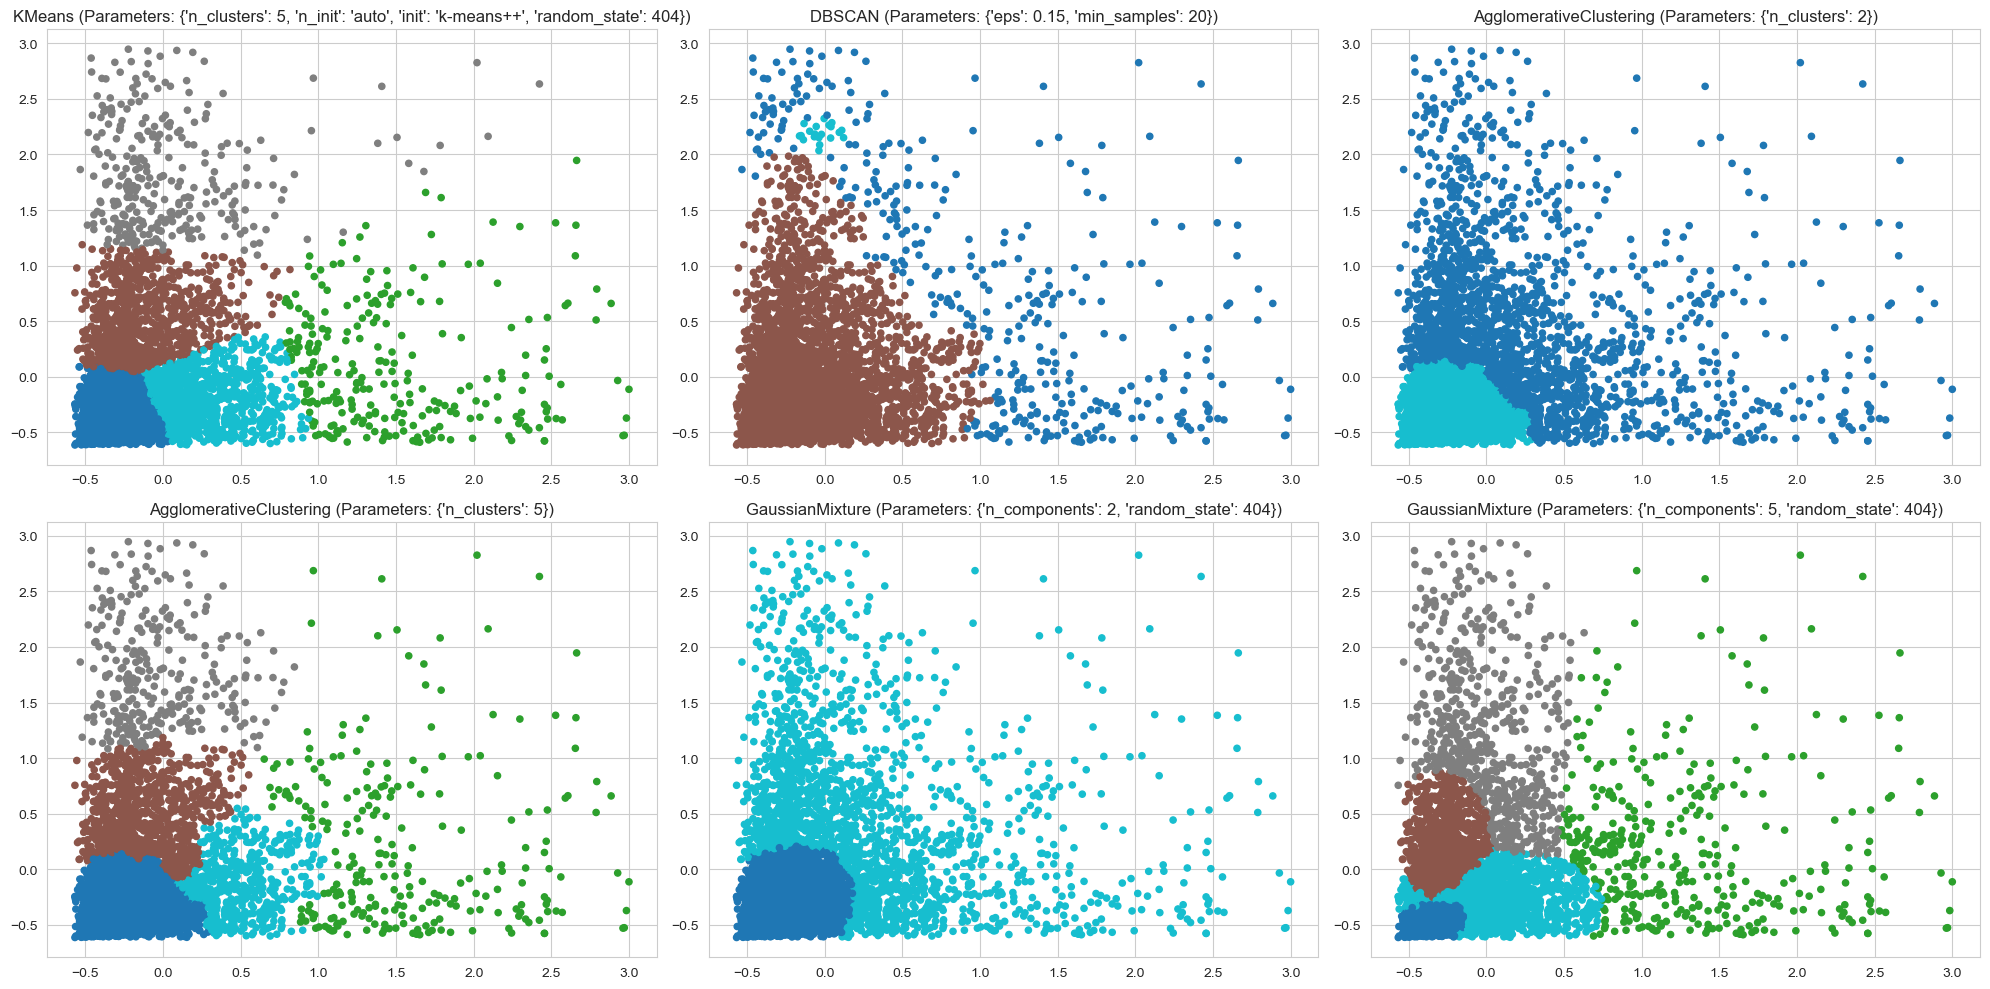

In [170]:
X = X_cluster.to_numpy() if isinstance(X_cluster, pd.DataFrame) else X_cluster

clustering_methods = [
    (KMeans, {'n_clusters': 5, 'n_init': 'auto', 'init': 'k-means++', 'random_state': 404}),
    (DBSCAN, {'eps': 0.15, 'min_samples': 20}),
    (AgglomerativeClustering, {'n_clusters': 2}),
    (AgglomerativeClustering, {'n_clusters': 5}),
    (GaussianMixture, {'n_components': 2, 'random_state': 404}),
    (GaussianMixture, {'n_components': 5, 'random_state': 404})
]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()

for i, (clustering_method, kwargs) in enumerate(clustering_methods):
    
    method = clustering_method(**kwargs)
    if isinstance(method, GaussianMixture):
        method.fit(X)
        y = method.predict(X)
    else:
        y = method.fit_predict(X)

    axs[i].scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=20)
    axs[i].set_title(f'{clustering_method.__name__} (Parameters: {kwargs})')

plt.tight_layout()
plt.show()

## Clustering Conclusion

Despite high silhuette scores, we have decided to disregard segmentations with fewer than 3 clusters as we don't recognize any semantic meaning in these and they don't reflect our intention of properly creating actionable customer segments that can be used targeted advertisement and marketing campaigns. This eliminates:
- DBSCAN
- Gaussian Mixture with n=2
- Agglomerative/Hierarchical Clustering with n=2

leaving us with 3 remaining options:
- KMeans
- Agglomerative/Hierarchical Clustering with n=5
- Gaussian Mixture with n=5

We see issues with Gaussian Mixture n=5 both when it comes to the split cluster around (-0.5,0), and because of the vertical size of the right cluster, stretching from very low to very high monthly paid, essentially not discriminating between largely different customers.

Comparing the last 2 options, we prefer KMeans as it has a more semantically logical divide between spending habits and item cost, as well as a more diagonal split between high spending and high item cost customers.


## Resulting Segments

### Clusters
1. Budget-Conscious (bottom lower left corner)
2. Regular Buyers (above budget-conscious on the y-axis)
3. Mid-Range Shoppers (middle on the x-axis, ~0.0-1.0)
4. Occasional Splurgers (bottom right on the x-axis)
5. Big Spenders (top left on the y-axis)

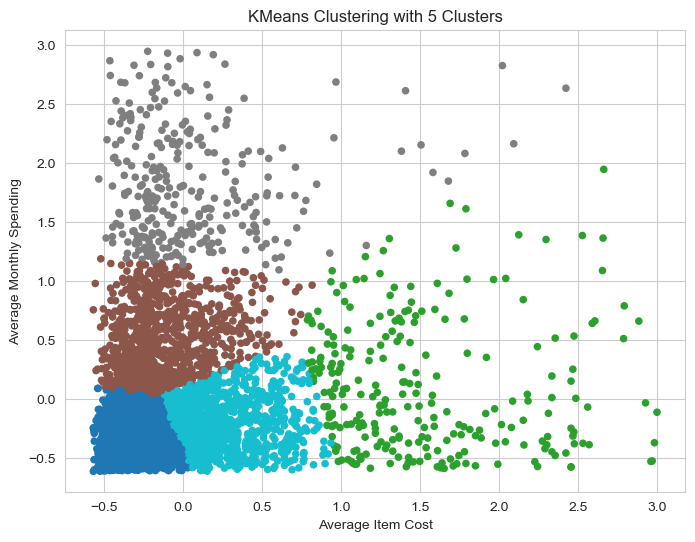

In [171]:
X = X_cluster.to_numpy() if isinstance(X_cluster, pd.DataFrame) else X_cluster

kmeans = KMeans(n_clusters=5, n_init='auto', init='k-means++', random_state=404)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='tab10', s=20)
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('Average Item Cost')
plt.ylabel('Average Monthly Spending')
plt.show()

# Determining Properties of Clusters

To further analyse the properties of the customers in these clusters, we will label the customers in our original dataset with these new clusters and run some classification tests to see if there are/which properties the clusters have in common.

One of the main uses of Clustering is actually to then use the cluster labels in classification models.

In [131]:
# Creating a copy of df_filtered to ensure it's a separate object, threw errors before
df_new = df_filtered.copy()

# Converting boolean columns to integer type
for col in df_new.select_dtypes(include=['bool']).columns:
    df_new[col] = df_new[col].astype('int32')

# Adding y_kmeans as a new column
df_new['Cluster'] = y_kmeans

# Display the DataFrame
df_new.head()

accountTotal  frequencyIndex  itemCosts  itemBuyFrequency  itemCount  \
0     -0.189423       -0.288479  -0.008712         -0.421204  -0.423640   
1     -0.645764       -0.361142  -0.416941         -1.652808  -0.681784   
2     -0.684392       -1.887126  -0.533420         -1.406485  -0.681784   
3     -0.460063        0.510847  -0.112352         -1.406485  -0.571150   
4     -0.431817       -0.797137   0.558350          0.071439  -0.239251   

   monthlyPaid  leastAmountPaid  accountLifespan  webUsage  avgItemCost  \
0    -0.532846        -0.268502        -4.479958  0.371273     0.421337   
1    -0.533694        -0.307591         0.332513 -0.982156     1.456126   
2    -0.573120        -0.335111        -4.479958  0.336570    -0.222406   
3    -0.217659        -0.267826         0.332513  0.232460     1.036191   
4    -0.296377        -0.271718         0.332513 -0.322793     0.669843   

   location_Chicago  location_Los Angeles  location_New York  \
0                 0                     0                  1   
1                 0                     0                  1   
2                 0                     0                  1   
3                 0                     0                  1   
4                 0                     0                  1   

   accountType_Premium  accountType_Regular  accountType_Student  Cluster  
0                    1                    0                    0        4  
1                    0                    0                    1        1  
2                    1                    0                    0        0  
3                    1                    0                    0        1  
4                    1                    0                    0        4

### Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_new.drop(['Cluster', 'monthlyPaid', 'avgItemCost', 'itemCount', 'itemCosts'], axis=1)
y = df_new['Cluster']  # Target: 'Cluster' column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404)

# Initialize the model
dtree = DecisionTreeClassifier(random_state=404)

# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=404)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
pred = dtree.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))


[[764   0   0   0   4]
 [  0  55   0   0   1]
 [  0   0 198   1   2]
 [  0   0   0  61   0]
 [  4   0   3   0 195]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       768
           1       1.00      0.98      0.99        56
           2       0.99      0.99      0.99       201
           3       0.98      1.00      0.99        61
           4       0.97      0.97      0.97       202

    accuracy                           0.99      1288
   macro avg       0.99      0.99      0.99      1288
weighted avg       0.99      0.99      0.99      1288

Accuracy: 0.9883540372670807


The results are not so good, let's do some tuning with GridSearchCV

### Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree model
dtree = DecisionTreeClassifier(random_state=404)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

In [135]:
# Use the best estimator for predictions
best_dtree = grid_search.best_estimator_
pred = best_dtree.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))

[[651   5  58   4  50]
 [ 34   7   4   0  11]
 [131   2  51   0  17]
 [ 40   3  11   4   3]
 [149   3  13   1  36]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.73       768
           1       0.35      0.12      0.18        56
           2       0.37      0.25      0.30       201
           3       0.44      0.07      0.11        61
           4       0.31      0.18      0.23       202

    accuracy                           0.58      1288
   macro avg       0.42      0.29      0.31      1288
weighted avg       0.53      0.58      0.53      1288

Accuracy: 0.5815217391304348


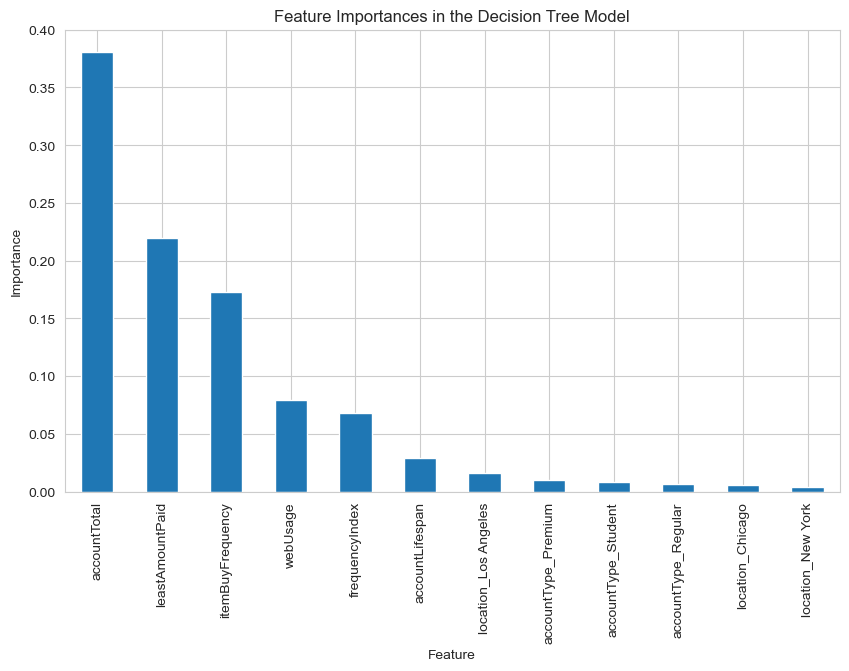

In [136]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = best_dtree.feature_importances_

# Map these importances to the corresponding feature names
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in the Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


The feature importance is interesting, but the accuracy is still horrible. Let's try to build a better model

# Artificial Neural Network

In [187]:
import tensorflow as tf
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense

X = df_new.drop(['Cluster', 'monthlyPaid', 'avgItemCost', 'itemCount', 'itemCosts'], axis=1)
y = df_new['Cluster']  # Target: 'Cluster' column

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Add one hidden layer 
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

# Add an output layer 
model.add(Dense(len(y.unique()), activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [188]:
# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
161/161 [==============================] - 0s 802us/step - loss: 1.2799 - accuracy: 0.5779
Epoch 2/200
161/161 [==============================] - 0s 835us/step - loss: 1.1577 - accuracy: 0.5853
Epoch 3/200
161/161 [==============================] - 0s 856us/step - loss: 1.1318 - accuracy: 0.5913
Epoch 4/200
161/161 [==============================] - 0s 906us/step - loss: 1.1028 - accuracy: 0.5927
Epoch 5/200
161/161 [==============================] - 0s 831us/step - loss: 1.0933 - accuracy: 0.5917
Epoch 6/200
161/161 [==============================] - 0s 866us/step - loss: 1.0857 - accuracy: 0.5917
Epoch 7/200
161/161 [==============================] - 0s 829us/step - loss: 1.0848 - accuracy: 0.5950
Epoch 8/200
161/161 [==============================] - 0s 794us/step - loss: 1.0773 - accuracy: 0.5966
Epoch 9/200
161/161 [==============================] - 0s 1ms/step - loss: 1.0752 - accuracy: 0.5977
Epoch 10/200
161/161 [==============================] - 0s 801us/step - los

In [189]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.6234471797943115


In [140]:
# Predict on test data
predictions = model.predict(X_test)

41/41 [==============================] - 0s 457us/step


In [141]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_classes))
print("\nClassification Report:\n", classification_report(y_test, predicted_classes))
print("Accuracy:", accuracy_score(y_test, predicted_classes))

Confusion Matrix:
 [[673  13  59   6  27]
 [ 39   4   6   1   5]
 [106   1  64   5  15]
 [ 30   0  14   3   6]
 [173   4  16   1  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       778
           1       0.18      0.07      0.10        55
           2       0.40      0.34      0.37       191
           3       0.19      0.06      0.09        53
           4       0.24      0.08      0.12       211

    accuracy                           0.59      1288
   macro avg       0.33      0.28      0.29      1288
weighted avg       0.51      0.59      0.53      1288

Accuracy: 0.5908385093167702
